# Notebook Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
import xgboost as xgb

/Users/wmeikle/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Introduction and Background

This machine learning problem is titled Click-Through Rate Prediction. The data for this problem comes from a competition posted on the website Kaggle. As per the instructions on the website, the goal of the competition is to find someone who can develop a program that can effectively classify whether something called a click through has occurred on an online advertisement. In analysing online activity, click throughs are defined as when, while surfing the web, someone sees an ad or a link on a webpage and clicks on it as opposed to simply scrolling past. This behaviour indicates that they are interested in the ad and want to get more information about the product or service being offered. Hence, click-through rate (CTR) is a very important metric for evaluating ad performance. As optimizing CTR is of significant importance for advertising companies, click through prediction systems are essential and are commonly used for both sponsored searches and real-time bidding. These systems are often supported by various machine learning algorithms. Thus, through the optimization and continuous evaluation of their machine learning programs, companies continue to search for ways to increase their CTR. Initially, based on the premise of the problem, we understand we are dealing with a binary output variable, 1 meaning click and 0 meaning a non-click.

# Exploratory Data Analysis

Initially, in deciding how best to approach this machine learning problem, properly understanding the structure and nature of the data provided in the various datasets on the Kaggle website was of paramount importance. Specifically, the data came in the form two different data sets, the training data set and the test data set. Initially, I imported both datasets to examine them more closely. After importing them both, I began working with the training dataset to develop the machine learning model to be later employed on the test dataset. In importing the training dataset, because the data comes in a specific format called a gz file, a unique unzipping method had to be used to open the data file. In importing the data, I also made some slight changes to its composition, specifically, I changed the variable hour into a datetime variable, which will make it much easier to model this variable later. I also added a sample size variable to make the dataset easier to manage later on. After successfully importing the dataset, I began by printing the head of the dataframe. In machine learning, one of the most important elements of a dataset is the number of features it has. By printing the head of the dataframe, I could easily see the number of features, their respective datatypes and the overall nature of the data. The result of this can be seen below. 

In [2]:
n = 40428967 
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size)) 

In [3]:
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/train.gz') as f:
    train = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date, skiprows = skip_values)

train.head()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_91060/4148211152.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
1,10010924186026106882,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
2,10020492815188881068,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
3,10020664336520302853,0,2014-10-21,1005,0,02d5151c,64778742,f028772b,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,100130,157
4,1002474033882047925,1,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17753,320,50,1993,2,1063,100084,33


Below is the import of the test dataset as well as the head of the test dataframe.

In [4]:
with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/test.gz') as f:
    test = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date)

test.head()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_91060/4148211152.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,2014-10-31,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


Based on the results of the training dataset table, we can see that there are many important features that compose this dataset. For example, we can see that the data is divided based on separate features associated with id, hour, banner_pos, site_id, site_domain, site_category, app_id, app_domain, device_type and device_conn_type. There are also several different categories labelled as C1, as well as C14 through C21. While the meaning of the other features is clearly discernible based on their names, it is unclear what these features with C labels mean. We will look to explore them more later. We can also view the datatypes of the different variables in the dataset. In the context of the EDA, it is important to understand what each of these variables mean as well as their data type.

In [5]:
train.dtypes

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object

Based on this chart, we can see that most of the variables are integers, with several of them also being objects. In defining these different variables, we generate the following list:

* id: defined as the ad identifier
* click:  0/1 for non-click/click
* hour: format is year/month/day/hour
* C1: unknown category of variable
* banner_pos: position where the add may be displayed
* site_id: ID of the website
* site_domain: domain where the site is hosted 
* site_category: category to which the site belongs
* app_id: application ID, app_domain: application domain
* app_category: application category
* device_id: ID of the device from which the ad is clicked
* device_ip: Network IP to which the device was connected
* device_model: model of the device
* device_type: type of device
* device_conn_type: connection type
* C14-C21: unknown categorical variables.

Because we are seeing a combination of different features types including integers and objects, it is likely we will need to convert some of these features to a different datatype later on in the process. Next, we can find the shape of the dataset.

In [6]:
train.shape

(1000000, 24)

In [7]:
test.shape

(4577464, 23)

We can see that the data is 100000 rows long and 24 columns or features wide. This figure and the ones before it give us a good general idea of the nature of the dataset. However, before we can begin to develop a machine learning model, a more in depth understanding of the data is crucial. One of the best and easiest ways to get a good idea of the nature of the data in terms of its variance and spread is by using descriptive statistics. Hence, the descriptive statistics for the numeric variables contained in the dataset can also be seen below.

In [8]:
train.describe()

,id,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.218645e+18,0.169106,1004.969757,0.287574,1.016067,0.331859,18846.955082,318.883112,60.125322,2113.328349,1.432602,227.144441,53221.649553,83.389210
std,5.325917e+18,0.374846,1.095029,0.507109,0.527963,0.855339,4957.267720,21.155235,47.333837,608.944591,1.326423,351.250168,49956.583284,70.261429
min,4.294807e+12,0.000000,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.600658e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.221179e+18,0.000000,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100049.000000,61.000000
75%,1.382962e+19,0.000000,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100094.000000,101.000000
max,1.844673e+19,1.000000,1012.000000,7.000000,5.000000,5.000000,24052.000000,1024.000000,1024.000000,2758.000000,3.000000,1839.000000,100248.000000,255.000000


In analysing the descriptive statistics seen above, we can see that, in terms of the output label, click, that there is a relatively wide spread of data. This will potentially affect the parameters we apply to our machine learning model later. We can also see that the other features banner_pos, site_id, site_domain, site_category, app_id, app_domain, device_type, device_conn_type as well as the features labelled C all have some variation. This means that conducting a more in-depth analysis of these different features could be beneficial to see which of their values has the strongest correlation with CTR. In general, we see that the number of observations in the dataset is very high. This means we may have to scale down the model in order to achieve better results. In order to accomplish this, I set a lower sample limit, and re imported the respective datasets another time.  We should also check to see if there are any missing values.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1000000 non-null  uint64        
 1   click             1000000 non-null  int64         
 2   hour              1000000 non-null  datetime64[ns]
 3   C1                1000000 non-null  int64         
 4   banner_pos        1000000 non-null  int64         
 5   site_id           1000000 non-null  object        
 6   site_domain       1000000 non-null  object        
 7   site_category     1000000 non-null  object        
 8   app_id            1000000 non-null  object        
 9   app_domain        1000000 non-null  object        
 10  app_category      1000000 non-null  object        
 11  device_id         1000000 non-null  object        
 12  device_ip         1000000 non-null  object        
 13  device_model      1000000 non-null  object 

We can see that there are no missing values. This means we do not need to make any adjustments to addess this issue. After developing a proper understanding of the features and composition of the data, visualizing the data was the most important step. In order to do this, I initially generated a pair plot to visualize the relationship between the different variables.

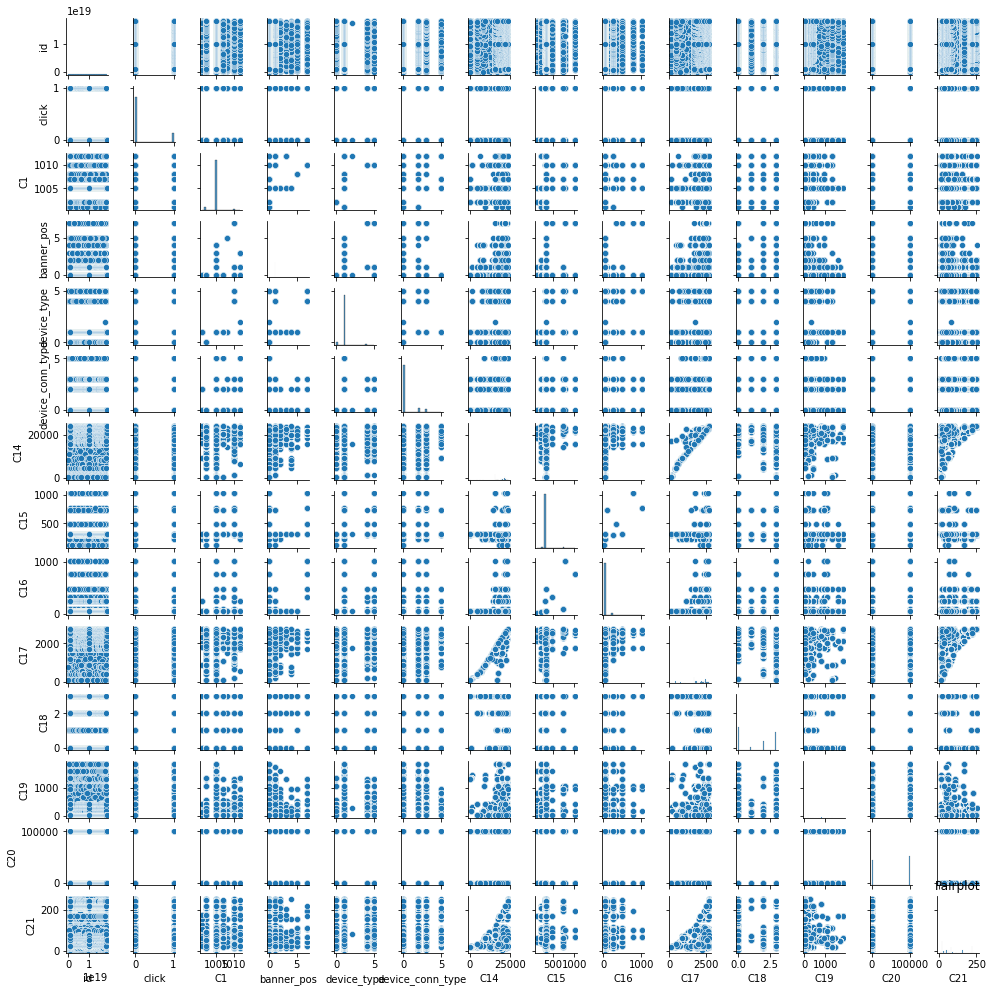

In [10]:
sns.pairplot(train, height = 1);
plt.title('Pairplot')
plt.show()

In analsing the pairplot, we notice several things. Specifically, we can see that several of the different C labelled features have strong correlations with each other. An example of this is C14 and C17. This correlation can be modelled in a more accessible way by using a heatmap. This can be seen below.

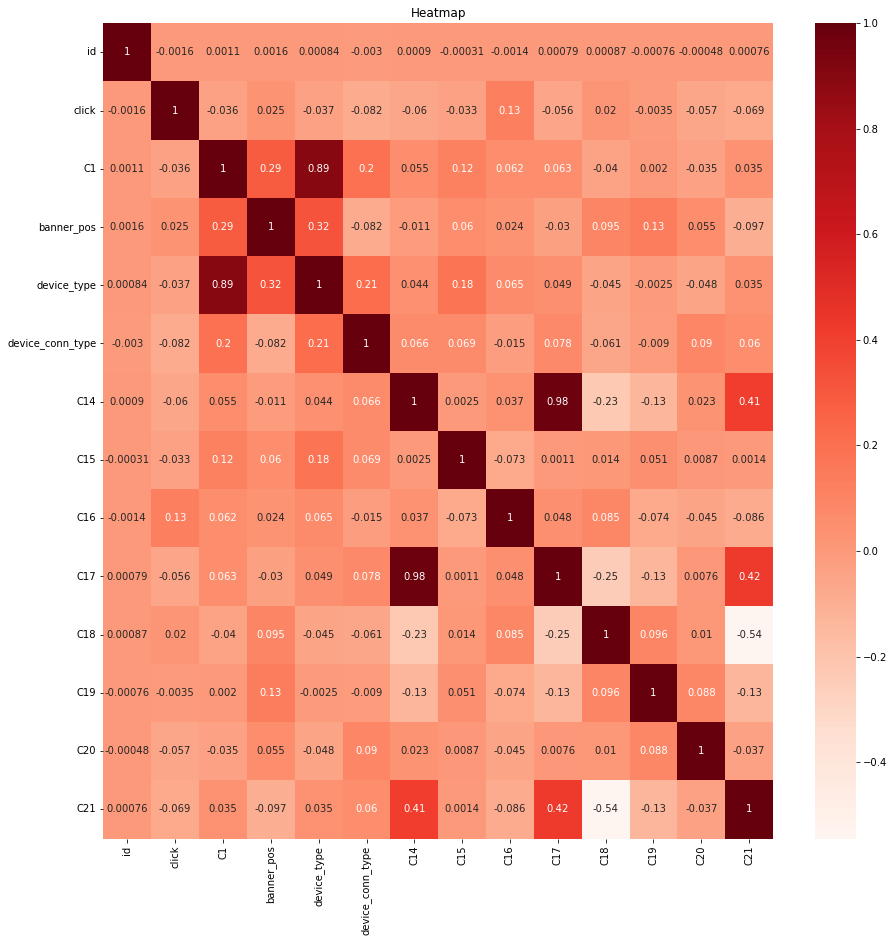

In [11]:
cor = train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Heatmap')
plt.show()

Based on this visual, we can also see thet device id and C1 are also strongly correlated. This may become relevant later as we try to improve our machine learning model. Next, because we are observing clicks per hour over a given set of time, I decided it would be a good idea to visualize the click data provided in the training dataset in a couple of different ways. Initially, in examining the data, it made the most sense to visualize the data based on the number of clicks in the total number of observations. Hence, I initially designed a histogram of the number of clicks, which can be seen below.

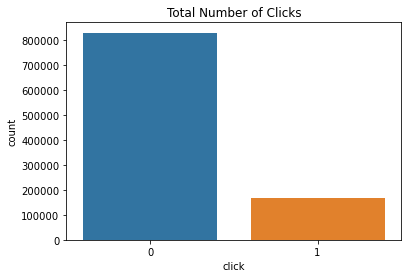

In [12]:
sns.countplot(x='click',data=train)
plt.title('Total Number of Clicks');
plt.show();

We can also view the total number of click throughs as a percentage.

In [13]:
train['click'].value_counts()/len(train)

0    0.830894
1    0.169106
Name: click, dtype: float64

Thus, we see that, based on the histogram and numerical calculations, about 17% of all impressions were click throughs. In online advertising, an ad impression is defined as when a person sees an ad on a webpage. This person then makes the decision whether or not to click on the ad. This means about 83% of people did not click though on the ads. We can see that, because the data is not balanced, accuracy will likely not be of very much use to us in evaluating the effectiveness of the model. Moving on, because this data is in part time series data with the click data being provided along with the hour and day that the data was collected, we can also visualize the number of clicks in the dataset across a variety of different time frames. This is where the datetime variable that was generated earlier comes in handy. Initially, we can take a closer look on the hour variable to get a better idea of how we can plot it.

In [14]:
train['hour'].describe()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_91060/54622670.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train['hour'].describe()


count                 1000000
unique                    240
top       2014-10-22 09:00:00
freq                    11005
first     2014-10-21 00:00:00
last      2014-10-30 23:00:00
Name: hour, dtype: object

We see based on the above figure that the hour variable measures the hours in the day over several different dates. We will begin by organizing the number of clicks by the hour as is. In this case, the hour variable refers to the hour on the specific date that the data was collected. Thus, this graph is more along the lines of graphing the number of clicks per hour by date, The result of this depiction can be seen below.

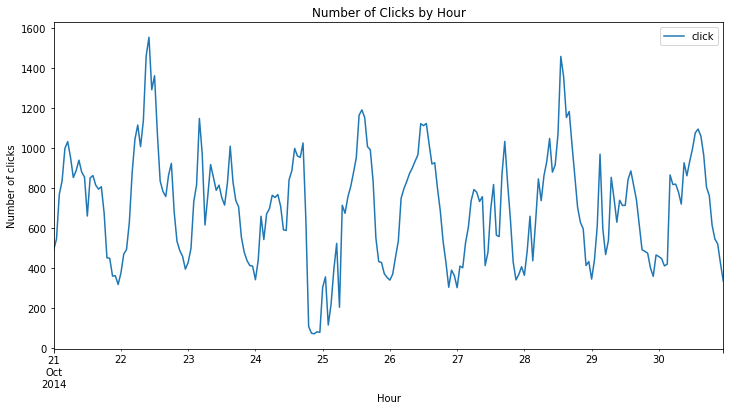

In [15]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.xlabel('Hour')
plt.title('Number of Clicks by Hour');

We see that a period at around midday on the 22nd and the 28th had the most clicks overall. This implies that this period, around midday, is the most active period for consumers in clicking on ads. There is also significant drop off in clicks on the night of the 24th. We can also view the trends of the clicks in the different hours of the day. This requires we generate a new variable called hour of day. This visualization can be seen below.

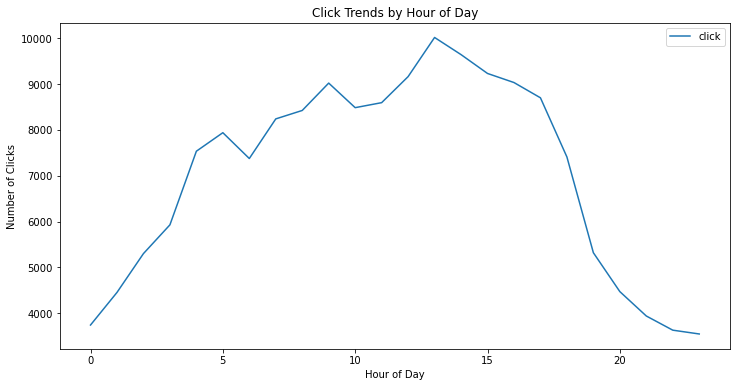

In [16]:
train['hour_of_day'] = train.hour.apply(lambda x: x.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of Clicks')
plt.xlabel('Hour of Day')
plt.title('Click Trends by Hour of Day');

We see that at about hour 13 to 14, there is the highest number of clicks in the day, with a significant drop off after hour 15. When compared to the previous chart, the results seem to be consistent, the time when there are the most clicks on advertisements is about midday. After understanding the trends of the number of clicks over time, we can also examine the number of clicks there are vis a vis impressions per hour. Based on the percentage of clicks vis a vis impressions, we can thus measure the effectiveness of an ad campaign. The number of clicks as compared to total impressions in the dataset by hour can be seen below.

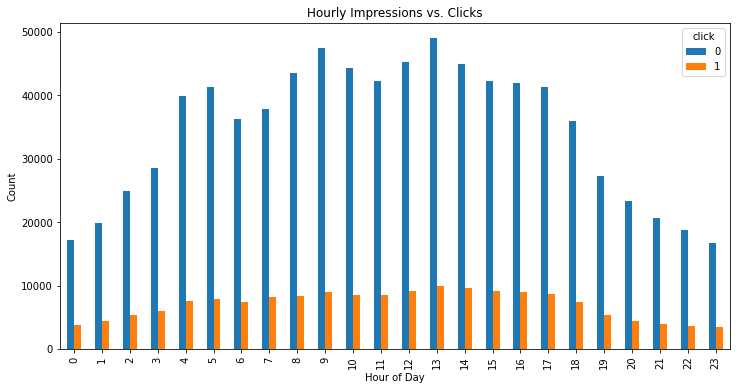

In [17]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Hour of Day')
plt.title('Hourly Impressions vs. Clicks');

In the above figure, while we can get a good idea of the total amount of clicks vis a vis the total number of impressions for each hour of the day in the dataset, it is still difficult to see the CTR. We can see that certain hours, such as hour 13 and hour 9 had a larger amount of ad impressions and clicks, but it is unclear whether those days also had a higher rate of clicks. Hence, visualizing the CTR by hour as the next step makes the most sense. Using this data, we can also calculate the CTR for the different hours in the day. The CTR for each hour of the day as expressed as a percentage can then be seen below.

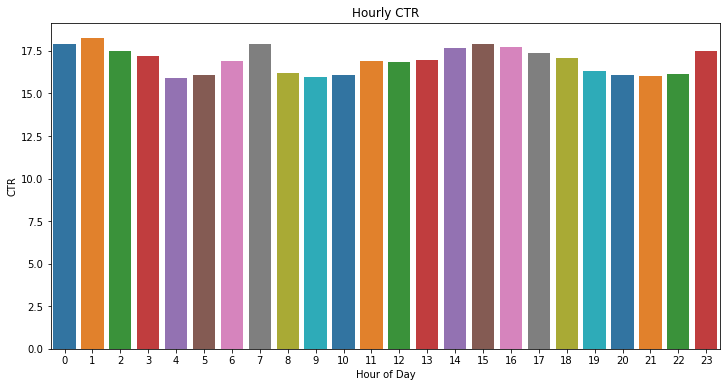

In [18]:
df_click = train[train['click'] == 1]
df_hour = train[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour, palette = 'tab10')
plt.xlabel('Hour of Day');
plt.title('Hourly CTR');

In analyzing this graph, we see that hours 1 and hour 16 through 17 of the day had the highest click through rates. This contradicts our earlier finding that indicates that the highest number of clicks were in the middle of the day. Since we are focusing on CTR in this machine learning problem, this is very significant. This graph indicates that the most active times for clicking on ads for consumers is about 1 in the morning and about 4 to 5 in the evening. Next, besides organizing it based on hour of the day, we can also organize the data by days of the week. This again requires that we generate a new variable for day of the week. A plot of the number of clicks vs days of the week can be seen below.

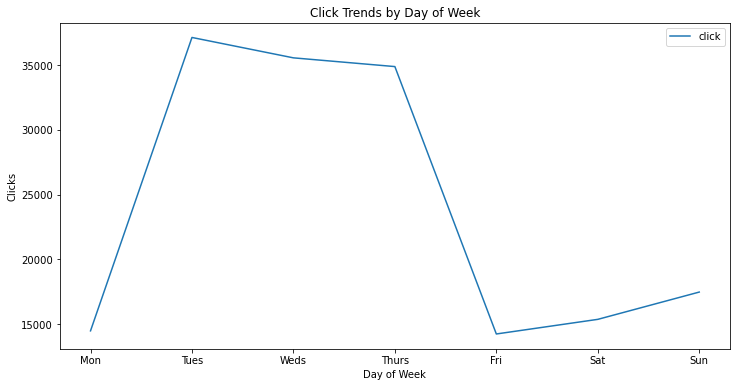

In [19]:
train['my_dates'] = pd.to_datetime(train['hour'])
train['day_of_week'] = train['my_dates'].dt.day_name()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.xlabel('Day of Week')
plt.ylabel('Clicks')
plt.title('Click Trends by Day of Week');

Based on this graph, we can see that Tuesday through Thursday had the most clicks, with a significant drop off occurring going into Friday through Monday. We can also model the number of impressions vs clicks by day of the week.

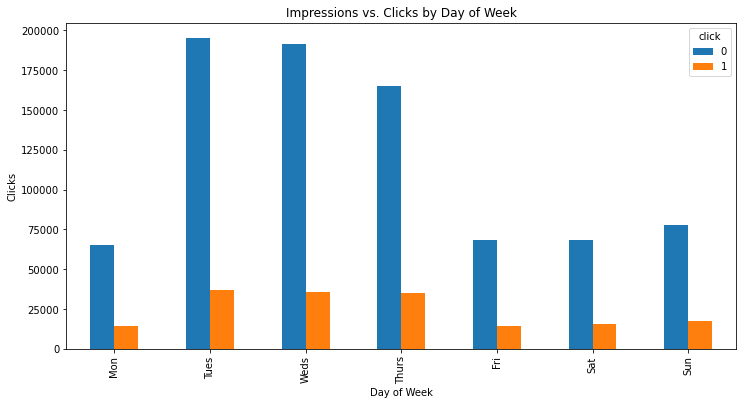

In [20]:
train.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar', title="Day of the Week", figsize=(12,6))
ticks = list(range(0, 7, 1)) 
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.ylabel('Clicks')
plt.xlabel('Day of Week')
plt.title('Impressions vs. Clicks by Day of Week');


This graph shows that Tuesday, Wednesday and Thursday had the most clicks as well as overall impressions. However, again it is difficult to use this graph to discern the CTR. Thus, we can also express the CTR as a percentage by day of the week. This graph can be seen below.

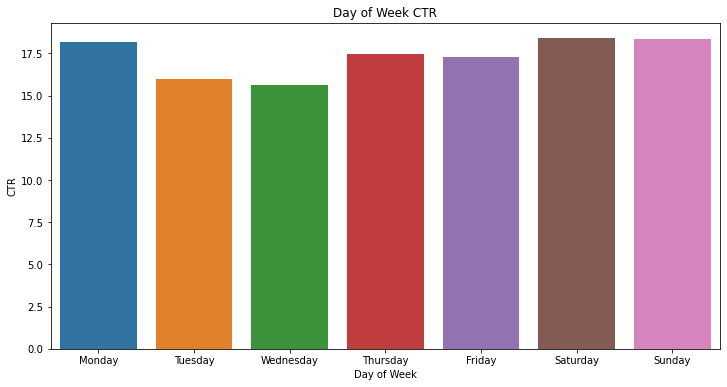

In [21]:
df_click = train[train['click'] == 1]
df_dayofweek = train[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('CTR')
plt.xlabel('Day of Week')
plt.title('Day of Week CTR');

In observing this graph, we see that Monday had the highest CTR followed by Saturday and Sunday. Thus, although Tuesday and Wednesday had the highest number of clicks overall, Monday has the highest CTR. Thus, having ads displayed on Monday would seem to be particularly beneficial for advertising companies. Next, we can print the head of the training dataset once more to see which features to examine next.

In [22]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_of_day,my_dates,day_of_week
0,10000679056417042096,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,0,2014-10-21,Tuesday
1,10010924186026106882,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,0,2014-10-21,Tuesday
2,10020492815188881068,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,2014-10-21,Tuesday
3,10020664336520302853,0,2014-10-21,1005,0,02d5151c,64778742,f028772b,ecad2386,7801e8d9,...,320,50,2161,0,35,100130,157,0,2014-10-21,Tuesday
4,1002474033882047925,1,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,320,50,1993,2,1063,100084,33,0,2014-10-21,Tuesday


Moving on to some of the more specific features contained within the dataset, including the features labeled C, we can break each one of them down individually to see their relationship with the output variable. Beginning with the variable C1, we can visualize the data in C1 to develop a better understanding of this feature. Based on the head of the dataset and the descriptive statistics we obtained earlier, we can see that there are several different values contained within the C1 feature, Thus, we begin by counting the number of times different values occur within the C1 feature. This can be seen below.

In [23]:
print(train.C1.value_counts()/len(train))

1005    0.918915
1002    0.054554
1010    0.022491
1012    0.002823
1007    0.000831
1001    0.000231
1008    0.000155
Name: C1, dtype: float64


Subsequently, we can also visualize the number of clicks vs impressions for values in the C1 label. This can be seen in the histogram below. 

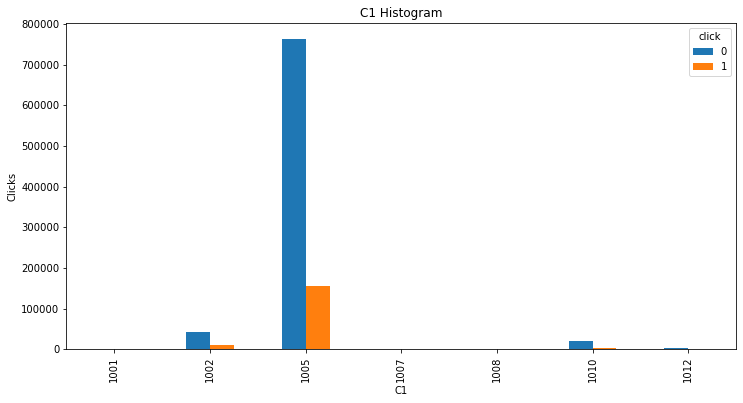

In [24]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 Histogram');
plt.ylabel('Clicks')
plt.xlabel('C1')
plt.show()

We can see that the value 1005 has the greatest amount of impressions and clicks. Next, we can measure the click through rate for each of these values.

In [25]:
C1_values = train.C1.unique()
C1_values.sort()
ctr_avg_list=[]
for i in C1_values:
    ctr_avg=train.loc[np.where((train.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for value in C1: {},  click through rate: {}".format(i,ctr_avg))

for value in C1: 1001,  click through rate: 0.047619047619047616
for value in C1: 1002,  click through rate: 0.2098654544121421
for value in C1: 1005,  click through rate: 0.16861298379066617
for value in C1: 1007,  click through rate: 0.039711191335740074
for value in C1: 1008,  click through rate: 0.14838709677419354
for value in C1: 1010,  click through rate: 0.09563825530212085
for value in C1: 1012,  click through rate: 0.17640807651434645


 We can also visualize the CTR by value in the C1 feature. This can be seen below.

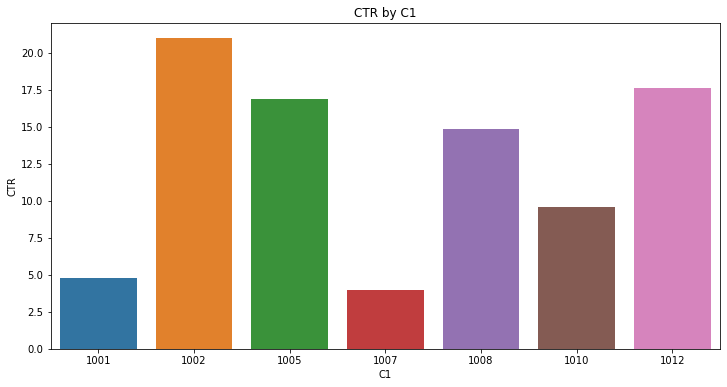

In [26]:
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

Based on this graph we can see that, although 1005 had the largest amount of click throughs overall, 1002 had the most as a percentage of impressions. Thus, it seems as though adding more ads on value 1002 would be beneficial. We could also potentially add more weights to this value in our machine learning model. Moving on, next we can look at the variable banner position. Similar to previous features, we can also begin by measuring the number of the different values there are in the dataset. 

In [27]:
print(train.banner_pos.value_counts()/len(train))

0    0.720591
1    0.277595
7    0.001099
2    0.000340
4    0.000171
5    0.000155
3    0.000049
Name: banner_pos, dtype: float64


We can also plot a histogram of clicks and total impressions for the different Banner Positions.

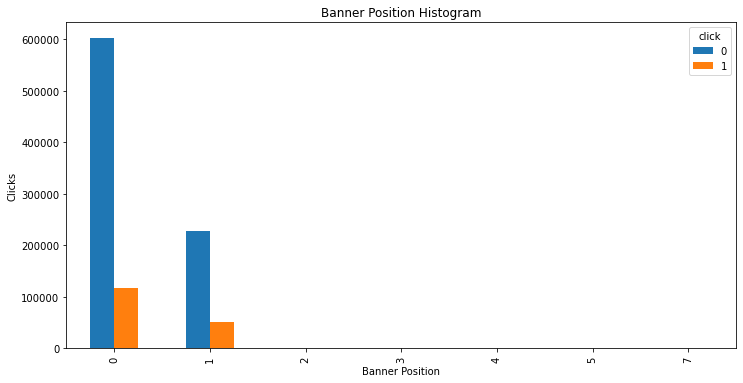

In [28]:
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Banner Position Histogram');
plt.ylabel('Clicks')
plt.xlabel('Banner Position')
plt.show()

Based on this, we see that banner positions 0 and 1 had the most impressions and number of clicks. We can also plot the CTR for each of the different banner positions.

In [29]:
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[np.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16379471850189636
for banner position: 1,  click through rate: 0.18235919234856535
for banner position: 2,  click through rate: 0.11470588235294117
for banner position: 3,  click through rate: 0.061224489795918366
for banner position: 4,  click through rate: 0.1871345029239766
for banner position: 5,  click through rate: 0.14838709677419354
for banner position: 7,  click through rate: 0.3257506824385805


We can also visualize the CTR for the banner positions. This can be seen below.

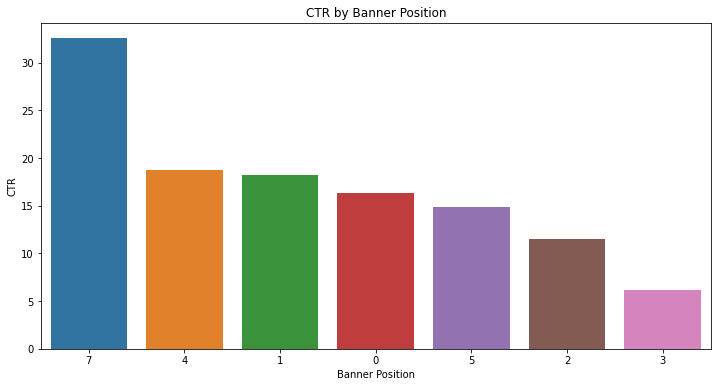

In [30]:
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.ylabel('CTR')
plt.xlabel('Banner Position')
plt.title('CTR by Banner Position');


Interestingly, we see that the click through rate was actually highest for banner position 7, even though this data wasn’t even visible on the previous graph. Thus, adding more ads on banner position 7 could be beneficial for advertising companies. Moving on from Banner Position, we can also conduct a similar analysis based on Site ID. Initially, we can see how many unique values there are in the site_id feature. This can be seen below.


In [31]:
train.site_id.nunique()

2646

We can also see which Site IDs have the most impressions in the dataset. This can be seen below.

In [32]:
print('The top 10 site ids that have the most impressions')
print((train.site_id.value_counts()/len(train))[0:10])

The top 10 site ids that have the most impressions
85f751fd    0.361780
1fbe01fe    0.160511
e151e245    0.065314
d9750ee7    0.023715
5b08c53b    0.022658
5b4d2eda    0.019141
856e6d3f    0.018781
a7853007    0.011247
b7e9786d    0.009121
5ee41ff2    0.008647
Name: site_id, dtype: float64


Moving on, we can also plot a histogram of clicks vs impressions by Site ID. This can be seen below.

Text(0.5, 0, 'Site ID')

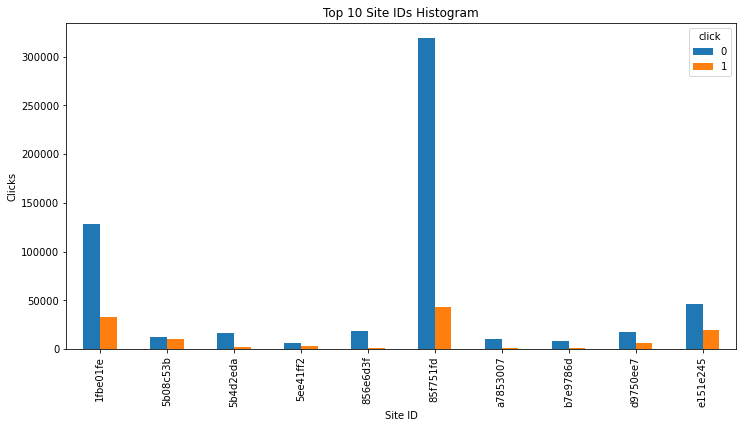

In [33]:
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
top10_sites.groupby(['site_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site IDs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Site ID')

Based on this figure, we see that Site ID 85f751fd had the most impressions as well as clicks. We can also measure the click though rate for each different Site ID. 

In [34]:
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_ids:
    click_avg=train.loc[np.where((train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click through rate: {}".format(i,click_avg))

for site id value: 85f751fd,  click through rate: 0.11902537453701144
for site id value: 1fbe01fe,  click through rate: 0.20359975328793664
for site id value: e151e245,  click through rate: 0.2950209755948189
for site id value: d9750ee7,  click through rate: 0.280202403542062
for site id value: 5b08c53b,  click through rate: 0.4660164180421926
for site id value: 5b4d2eda,  click through rate: 0.1285721749124915
for site id value: 856e6d3f,  click through rate: 0.040093711729939835
for site id value: a7853007,  click through rate: 0.10082688716991198
for site id value: b7e9786d,  click through rate: 0.07257976099111939
for site id value: 5ee41ff2,  click through rate: 0.33583901931305654


We can then also plot the CTR of the different Site IDs.

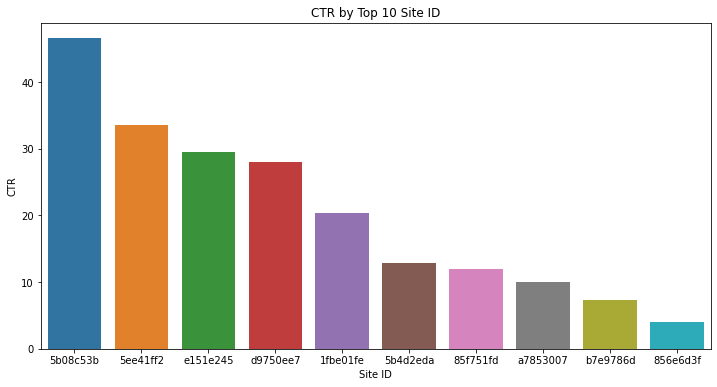

In [35]:
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.ylabel('CTR')
plt.xlabel('Site ID')
plt.title('CTR by Top 10 Site ID');

Thus, we see that although Site ID 85f751fd had the most impressions overall, Site ID 5b08c53b had the highest CTR. Thus, adding more ads on this site ID could be beneficial moving forward. Moving on from Site ID, next we can study Site Domain. In viewing how many unique Site Domains there are in the dataset, we get the figure below.

In [36]:
train.site_domain.nunique()

2841

Next, we can examine which Site Domains had the most impressions overall as a percentage. This can be seen below.

In [37]:
print('The top 10 site domains that have the most impressions')
print((train.site_domain.value_counts()/len(train))[0:10])

The top 10 site domains that have the most impressions
c4e18dd6    0.374865
f3845767    0.160511
7e091613    0.082247
7687a86e    0.031904
98572c79    0.024595
16a36ef3    0.021224
58a89a43    0.018781
9d54950b    0.009488
b12b9f85    0.009249
17d996e6    0.008763
Name: site_domain, dtype: float64


We can also visualize the number of clicks vs impressions by site domain. This can be seen below.

Text(0, 0.5, 'Clicks')

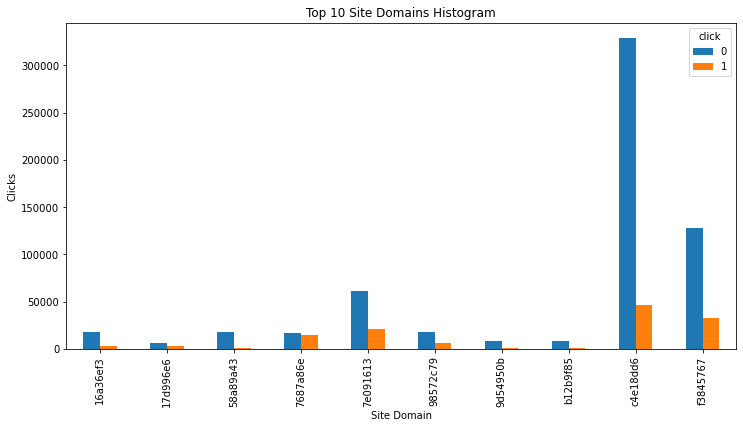

In [38]:
top10_domain = train[(train.site_domain.isin((train.site_domain.value_counts()/len(train))[0:10].index))]
top10_domain_click = top10_domain[top10_domain['click'] == 1]
top10_domain.groupby(['site_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site Domains Histogram');
plt.xlabel('Site Domain')
plt.ylabel('Clicks')

Based on this graph, we see that site domain c4e18dd6 and site domain f3845767 have the largest amount of clicks as well as impressions. Subsequently, we can see the CTR for each for the top site domain values.

In [39]:
top10_domains = (train.site_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: c4e18dd6,  click through rate: 0.12294292612006989
for site domain value: f3845767,  click through rate: 0.20359975328793664
for site domain value: 7e091613,  click through rate: 0.2569820175811884
for site domain value: 7687a86e,  click through rate: 0.4611020561685055
for site domain value: 98572c79,  click through rate: 0.27387680422850175
for site domain value: 16a36ef3,  click through rate: 0.14130229928382962
for site domain value: 58a89a43,  click through rate: 0.040093711729939835
for site domain value: 9d54950b,  click through rate: 0.11203625632377741
for site domain value: b12b9f85,  click through rate: 0.07308898259271272
for site domain value: 17d996e6,  click through rate: 0.33253452014150403


Next, we can visualize the CTRs for the different site domains.

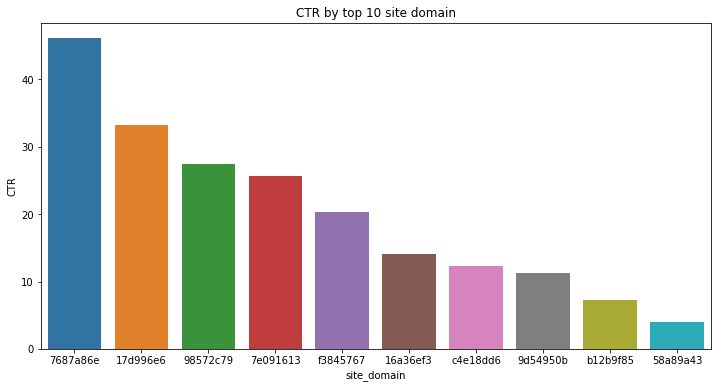

In [40]:
df_domain = top10_domain[['site_domain','click']].groupby(['site_domain']).count().reset_index()
df_domain = df_domain.rename(columns={'click': 'impressions'})
df_domain['clicks'] = top10_domain_click[['site_domain','click']].groupby(['site_domain']).count().reset_index()['click']
df_domain['CTR'] = df_domain['clicks']/df_domain['impressions']*100
sort_domain = df_domain.sort_values(by='CTR',ascending=False)['site_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_domain', data=df_domain, order=sort_domain)
plt.title('CTR by top 10 site domain');

Based on this graph, we can see that the site domain 7687a86e has the highest click through rate. However, we saw eariler that c4e18dd6 and f3845767 had the largest amount of clicks. Thus, adding more ads on site domain 7687a86e could be beneficial. Next, we can also examine the site_category feature. To begin with, we can also examine the number of unique site categories there are in the dataset. This can be seen below.

In [41]:
train.site_category.nunique()

20

Next, we can examine which site categories have the most impressions. This can be seen below.

In [42]:
print('The top 10 site categories that have the most impressions')
print((train.site_category.value_counts()/len(train))[0:10])

The top 10 site categories that have the most impressions
50e219e0    0.409435
f028772b    0.312877
28905ebd    0.182440
3e814130    0.075191
f66779e6    0.006230
75fa27f6    0.004019
335d28a8    0.003360
76b2941d    0.002665
c0dd3be3    0.001055
72722551    0.000690
Name: site_category, dtype: float64


Next, we can generate a histogram of clicks vs total impressions by site category. This figure can be seen below.

Text(0, 0.5, 'Clicks')

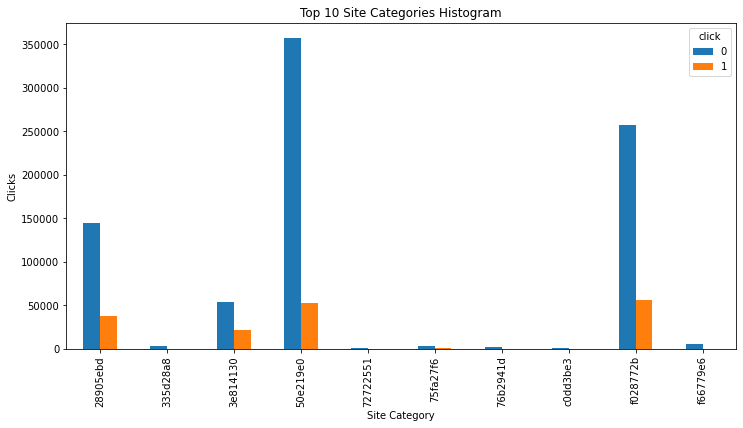

In [43]:
top10_category = train[(train.site_category.isin((train.site_category.value_counts()/len(train))[0:10].index))]
top10_category_click = top10_category[top10_category['click'] == 1]
top10_category.groupby(['site_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Site Categories Histogram');
plt.xlabel('Site Category')
plt.ylabel('Clicks')

We see that site category 50e219e0 and f028772b have the highest number of impressions and clicks. Next, we can view CTR by site category.

In [44]:
top10_domains = (train.site_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_domains:
    click_avg=train.loc[np.where((train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site domain value: {},  click through rate: {}".format(i,click_avg))

for site domain value: 50e219e0,  click through rate: 0.12852345305115587
for site domain value: f028772b,  click through rate: 0.17882107026083732
for site domain value: 28905ebd,  click through rate: 0.20641854856391142
for site domain value: 3e814130,  click through rate: 0.28236092085488956
for site domain value: f66779e6,  click through rate: 0.03418940609951846
for site domain value: 75fa27f6,  click through rate: 0.11346105996516546
for site domain value: 335d28a8,  click through rate: 0.0931547619047619
for site domain value: 76b2941d,  click through rate: 0.0300187617260788
for site domain value: c0dd3be3,  click through rate: 0.10900473933649289
for site domain value: 72722551,  click through rate: 0.0463768115942029


We can also visualize the CTR of the different Site Categories

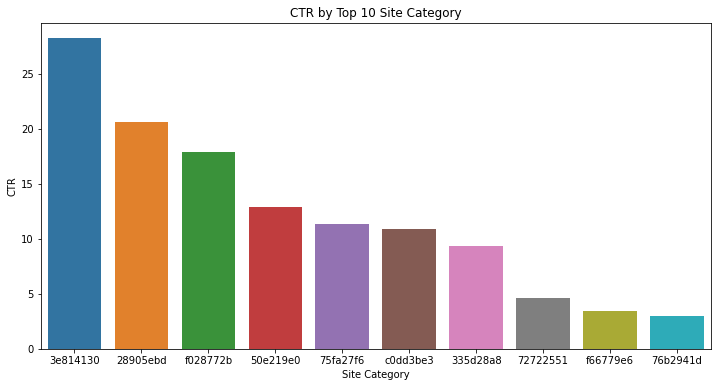

In [45]:
df_category = top10_category[['site_category','click']].groupby(['site_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_category_click[['site_category','click']].groupby(['site_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['site_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_category', data=df_category, order=sort_category)
plt.xlabel('Site Category')
plt.title('CTR by Top 10 Site Category');

We see that Site Category 3e814130 has the highest CTR. This is in contrast to the site categories that had the highest number of clicks. Thus, it would seem that putting more ads on the site category 3e814130 could be beneficial moving forward. Moving on, we can then view the device ID feature. We can do this by initially seeing how many unique devices their are in the dataset.

In [46]:
train.device_id.nunique()

150557

We can also view the device id's that had the most impresssions overall by percentage.

In [47]:
print('The top 10 devices that have the most impressions')
print((train.device_id.value_counts()/len(train))[0:10])

The top 10 devices that have the most impressions
a99f214a    0.824856
0f7c61dc    0.000536
c357dbff    0.000489
936e92fb    0.000346
afeffc18    0.000230
987552d1    0.000111
b09da1c4    0.000101
d857ffbb    0.000088
28dc8687    0.000084
cef4c8cc    0.000081
Name: device_id, dtype: float64


We can also plot a barplot of the device IDs with the higest amount of impressions and clicks.

Text(0.5, 0, 'Device ID')

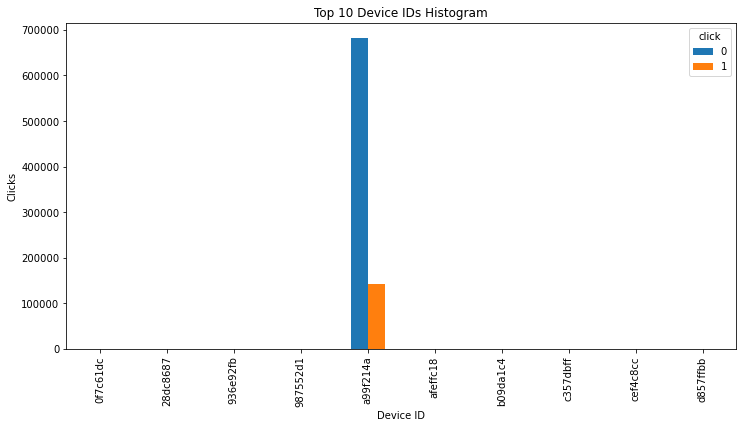

In [48]:
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device IDs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device ID')

We see that device id a991214a had the most clicks and overall impressions. Next we can view the CTR by device id as well.

In [49]:
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: a99f214a,  click through rate: 0.17335631916358735
for device id value: 0f7c61dc,  click through rate: 0.7779850746268657
for device id value: c357dbff,  click through rate: 0.5787321063394683
for device id value: 936e92fb,  click through rate: 0.06358381502890173
for device id value: afeffc18,  click through rate: 0.1826086956521739
for device id value: 987552d1,  click through rate: 0.0
for device id value: b09da1c4,  click through rate: 0.1188118811881188
for device id value: d857ffbb,  click through rate: 0.26136363636363635
for device id value: 28dc8687,  click through rate: 0.0
for device id value: cef4c8cc,  click through rate: 0.18518518518518517


We can also visualize the CTR by device ID.

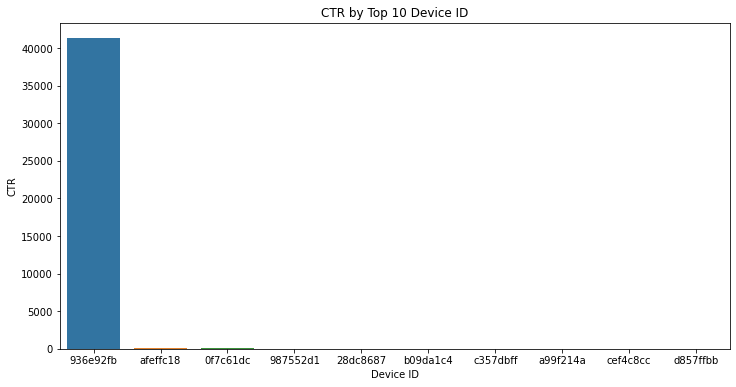

In [50]:
df_category = top10_device[['device_id','click']].groupby(['device_id']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_id','click']].groupby(['device_id']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_id', data=df_category, order=sort_category)
plt.xlabel('Device ID')
plt.title('CTR by Top 10 Device ID');

We can see that the device id 936e92fb has an extremely high CTR even though we couldnt even see this value on the previous graph. Adding more values on this device id could be beneficial for advertising companies. Next, we can study a number of other features in the dataset associated with the devices that users were using when they clicked on the ads. These include device ips, device types, device models and device connection. We can begin by checking how many unique values there are of each of these features in the dataset.

In [51]:
print(str(train.device_ip.nunique()) + " = number of device ips in the dataset")

555621 = number of device ips in the dataset


Next, we can measure the top device ips by percentage of impressions.

In [52]:
print('The impressions by device ips')
print((train.device_ip.value_counts()/len(train)))

The impressions by device ips
6b9769f2    0.005199
431b3174    0.003224
af9205f9    0.002237
2f323f36    0.002234
009a7861    0.002157
              ...   
09143d48    0.000001
8210462d    0.000001
f92b5b21    0.000001
af31eb13    0.000001
01358040    0.000001
Name: device_ip, Length: 555621, dtype: float64


Next, we can generate a histogram of the number of clicks vs impressions by device ips.

Text(0.5, 0, 'Device IP')

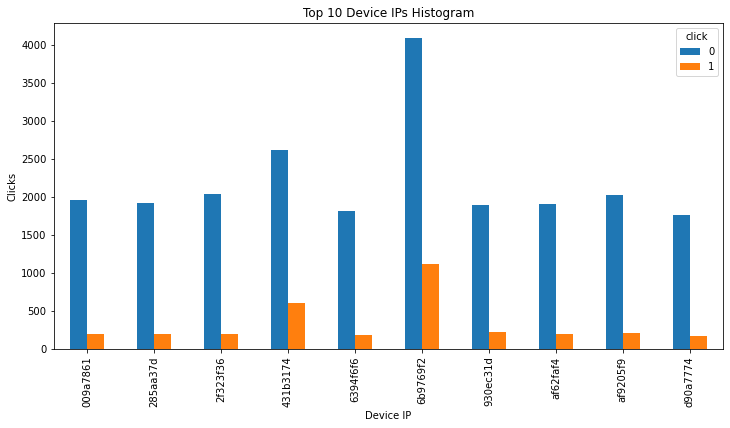

In [53]:
top10_device = train[(train.device_ip.isin((train.device_ip.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_ip', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device IPs Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device IP')

We can see that the device IPs 6b976912 and 431b3174 had the largest amount of impressions and clicks in the dataset. Next, we can calculate the CTR by device IP.

In [54]:
top10_devices = (train.device_ip.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_ip == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: 6b9769f2,  click through rate: 0.2148490094248894
for device id value: 431b3174,  click through rate: 0.1892059553349876
for device id value: af9205f9,  click through rate: 0.09566383549396514
for device id value: 2f323f36,  click through rate: 0.08594449418084155
for device id value: 009a7861,  click through rate: 0.09086694483078349
for device id value: 930ec31d,  click through rate: 0.10739519547809703
for device id value: 285aa37d,  click through rate: 0.09168241965973535
for device id value: af62faf4,  click through rate: 0.09099571224392568
for device id value: 6394f6f6,  click through rate: 0.09154577288644322
for device id value: d90a7774,  click through rate: 0.08850931677018634


We can next visualize this graph as well.

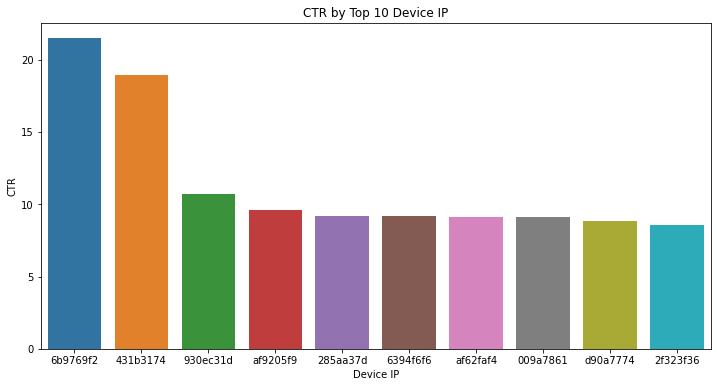

In [55]:
df_category = top10_device[['device_ip','click']].groupby(['device_ip']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_ip','click']].groupby(['device_ip']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_ip'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_ip', data=df_category, order=sort_category)
plt.xlabel('Device IP')
plt.title('CTR by Top 10 Device IP');

We can see that the two sites that had the most impressions also had the highest CTR. Thus, companies should continue emphasizing these device ips. Next, moving on to device types, we can begin by measuring the number of unique values there are in the dataset.

In [56]:
print(str(train.device_type.nunique()) + " = number of device types in the dataset")

5 = number of device types in the dataset


We can then visualize the percentage of impressions there are for each device type.

In [57]:
print('The impressions by device types')
print((train.device_type.value_counts()/len(train)))

The impressions by device types
1    0.922954
0    0.054554
4    0.019344
5    0.003147
2    0.000001
Name: device_type, dtype: float64


Next, we can also plot a histogram of impressions vs clicks by device type.

Text(0, 0.5, 'Device Type')

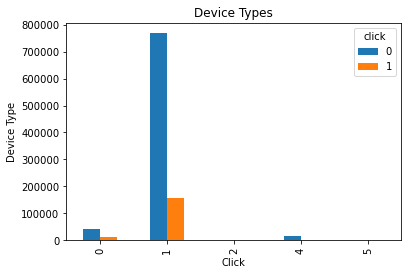

In [58]:
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='Device Types');
plt.xlabel('Click')
plt.ylabel('Device Type')

We see that device type 1 and 0 had the highest amount of overall impressions and clicks. Next, we can calculate the CTR for each device type.

In [59]:
top10_devices = (train.device_type.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_type == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device id value: {},  click through rate: {}".format(i,click_avg))

for device id value: 1,  click through rate: 0.1684872702214845
for device id value: 0,  click through rate: 0.2098654544121421
for device id value: 4,  click through rate: 0.09558519437551696
for device id value: 5,  click through rate: 0.0959644105497299
for device id value: 2,  click through rate: 0.0


Next, we can plot the CTR for each device type in a graph.

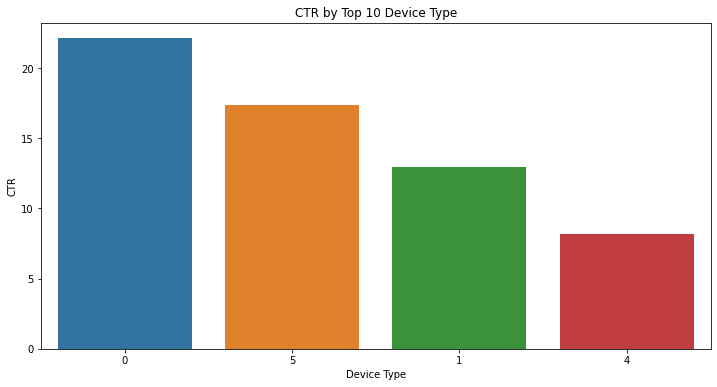

In [60]:
df_category = top10_device[['device_type','click']].groupby(['device_type']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_type','click']].groupby(['device_type']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_type'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_type', data=df_category, order=sort_category)
plt.xlabel('Device Type')
plt.title('CTR by Top 10 Device Type');

Based on this graph, we can see that device type 0 and 1 had the highest CTR. Thus, companies should continue to emphasize these two Device Types. Next, we can also examine the different device models in the dataset, beginning by measuring the number of unique values there are the in the dataset.

In [61]:
print(str(train.device_model.nunique()) + " = number of device models in the dataset")

5166 = number of device models in the dataset


We can also plot which device models have the highest amount of impressions.

In [62]:
print('The impressions by device models')
print((train.device_model.value_counts()/len(train)))

The impressions by device models
8a4875bd    0.060845
1f0bc64f    0.035125
d787e91b    0.034757
76dc4769    0.019191
be6db1d7    0.018434
              ...   
ec5dda9d    0.000001
734baf51    0.000001
1f220840    0.000001
c3e43175    0.000001
3f28da5e    0.000001
Name: device_model, Length: 5166, dtype: float64


We can also plot a histogram of impressions vs clicks by device model.

Text(0.5, 0, 'Device Model')

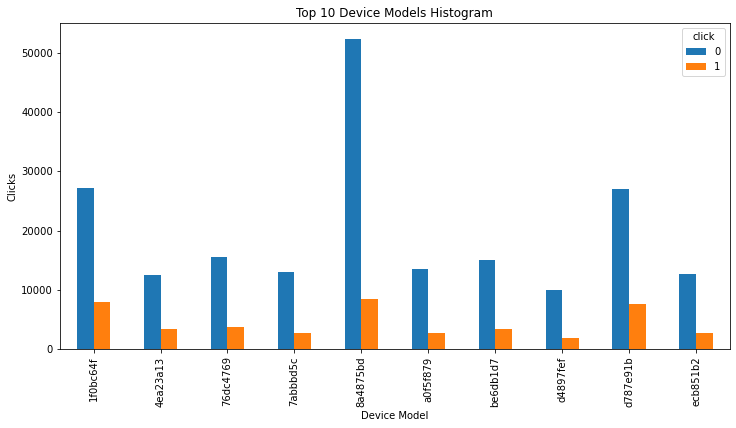

In [63]:
top10_device = train[(train.device_model.isin((train.device_model.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_model', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device Models Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device Model')

We see that the device models with the largest amount of clicks and overall impressions were 8a4875bd and 1f0bc64f. We can also view the CTR for each device model.

In [64]:
top10_devices = (train.device_model.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_model== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device model value: {},  click through rate: {}".format(i,click_avg))

for device model value: 8a4875bd,  click through rate: 0.13927192045361164
for device model value: 1f0bc64f,  click through rate: 0.22659074733096085
for device model value: d787e91b,  click through rate: 0.2212791667865466
for device model value: 76dc4769,  click through rate: 0.19092282840915012
for device model value: be6db1d7,  click through rate: 0.18672019095150266
for device model value: a0f5f879,  click through rate: 0.16446183466865413
for device model value: 4ea23a13,  click through rate: 0.2150469824052469
for device model value: 7abbbd5c,  click through rate: 0.17313792665905342
for device model value: ecb851b2,  click through rate: 0.17917235106866758
for device model value: d4897fef,  click through rate: 0.16370974522828555


We can also visualize the CTR for the various device models.

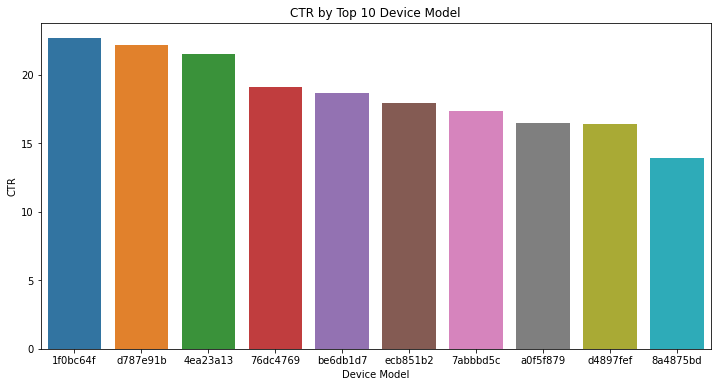

In [65]:
df_category = top10_device[['device_model','click']].groupby(['device_model']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_model','click']].groupby(['device_model']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_model'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_model', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 Device Model');

We can see that 1f0bc64f had the highest CTR. Thus, companies should continue emphasizing this device model type. However, 8a4875bd is much lower. This means that companies should emphasize other device models to achieve success. Next, we can also study the different device connection types. To begin with, we can see the number of unique device connection types there are below.

In [66]:
print(str(train.device_conn_type.nunique()) + " = number of device connection types in the dataset")

4 = number of device connection types in the dataset


We can also plot the percentage of total impressions there are by device connection type.

In [67]:
print('The impressions by device connection')
print((train.device_conn_type.value_counts()/len(train)))

The impressions by device connection
0    0.862679
2    0.082226
3    0.054034
5    0.001061
Name: device_conn_type, dtype: float64


We can also plot a histogram of clicks vs total impressions by device connection type.

Text(0.5, 0, 'Device Connection Type')

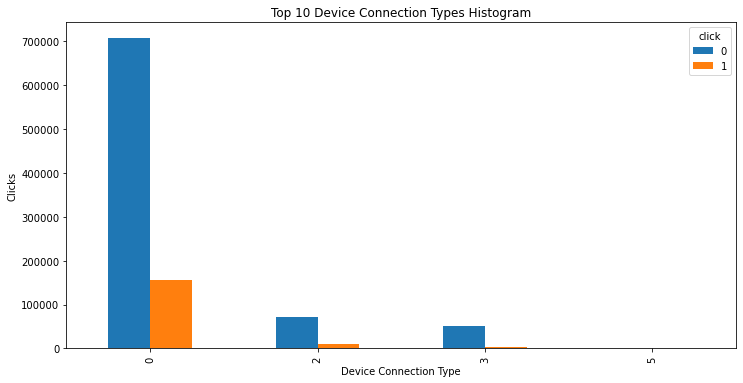

In [68]:
top10_device = train[(train.device_conn_type.isin((train.device_conn_type.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_conn_type', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 Device Connection Types Histogram');
plt.ylabel('Clicks')
plt.xlabel('Device Connection Type')

We see that device 0 had the largest amount of clicks and overall impressions. We can also plot the CTR for each device connection type.

In [69]:
top10_devices = (train.device_conn_type.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.device_conn_type== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device connection type: {},  click through rate: {}".format(i,click_avg))

for device connection type: 0,  click through rate: 0.1802026014311233
for device connection type: 2,  click through rate: 0.13572349378542067
for device connection type: 3,  click through rate: 0.045434356146130214
for device connection type: 5,  click through rate: 0.03204524033930255


We can also visualize the CTR for each device connection type.

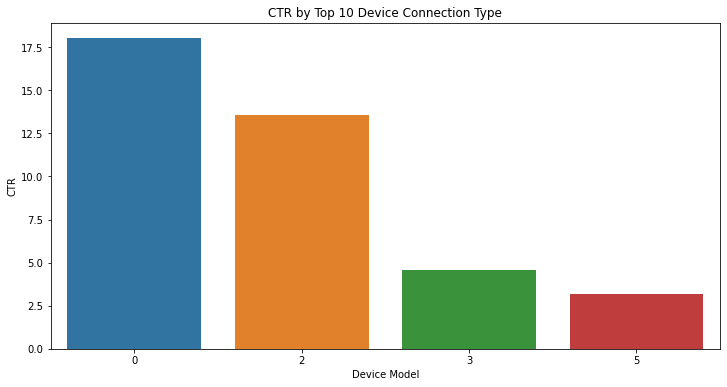

In [70]:
df_category = top10_device[['device_conn_type','click']].groupby(['device_conn_type']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['device_conn_type','click']].groupby(['device_conn_type']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['device_conn_type'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='device_conn_type', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 Device Connection Type');

We can see that device type 0 had the highest CTR. Thus, companies should continue emphasizing this device connection type. Next, we can also study a few different characteristics of apps incorporated in the dataset. Beginning with App ID, we can see the number of unique App ID values below.

In [71]:
train.app_id.nunique()

3135

We can next view the total percentage of impressions in app ID by the unique values in the category. This can be seen below.

In [72]:
print('The impressions by app ID')
print((train.app_id.value_counts()/len(train)))

The impressions by app ID
ecad2386    0.638220
92f5800b    0.038519
e2fcccd2    0.027938
9c13b419    0.018977
febd1138    0.018883
              ...   
c57b52d6    0.000001
b8ec11e6    0.000001
a99d30b4    0.000001
407af0fb    0.000001
f6c2f1c3    0.000001
Name: app_id, Length: 3135, dtype: float64


We can also plot a histogram of the the number of clicks vs total impressions by app ID.

Text(0.5, 0, 'App ID')

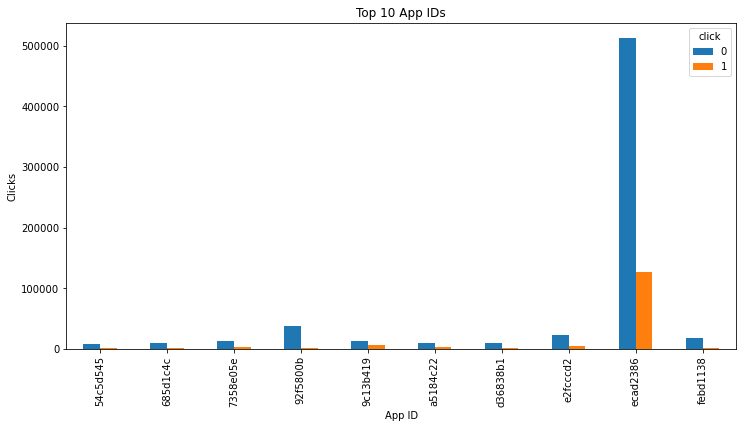

In [73]:
top10_device = train[(train.app_id.isin((train.app_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App IDs');
plt.ylabel('Clicks')
plt.xlabel('App ID')

Based on this figure, we see that value ecad2386 had the largest amount of impressions as well as clicks. Next, we can view the CTR by App ID.

In [74]:
top10_devices = (train.app_id.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_id== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for app ID value: {},  click through rate: {}".format(i,click_avg))

for app ID value: ecad2386,  click through rate: 0.19749459434050953
for app ID value: 92f5800b,  click through rate: 0.020223785664217658
for app ID value: e2fcccd2,  click through rate: 0.19360727324790608
for app ID value: 9c13b419,  click through rate: 0.3083732939874585
for app ID value: febd1138,  click through rate: 0.04919769104485516
for app ID value: 7358e05e,  click through rate: 0.18741842860871835
for app ID value: a5184c22,  click through rate: 0.2488441215323646
for app ID value: d36838b1,  click through rate: 0.06832298136645963
for app ID value: 685d1c4c,  click through rate: 0.07715716108766074
for app ID value: 54c5d545,  click through rate: 0.12385137834598482


We can also visualize the CTR by App ID.

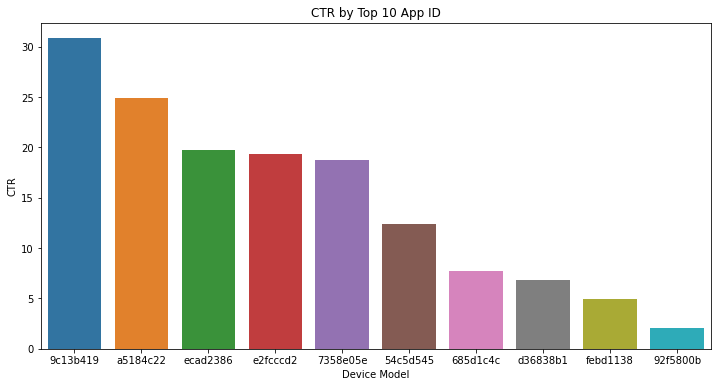

In [75]:
df_category = top10_device[['app_id','click']].groupby(['app_id']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_id','click']].groupby(['app_id']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_id', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 App ID');

Based on this figure, we can see that App ID 9c13b419 had the highest CTR. This is in contrast to the App ID we saw earlier with the largest number of clicks. Thus, companies should potentially emphasize this particular App ID more in the future. Next, we can also measure the number of unqiue App Domain values there are in the dataset.

In [76]:
train.app_domain.nunique()

197

Next, we can measure how many impressions there are for each App Domain value.

In [77]:
print('The impressions by App Domain')
print((train.app_domain.value_counts()/len(train)))

The impressions by App Domain
7801e8d9    0.673107
2347f47a    0.130217
ae637522    0.046569
5c5a694b    0.027943
82e27996    0.018883
              ...   
29cd071c    0.000001
32f9558b    0.000001
52a052f3    0.000001
9c566260    0.000001
70146488    0.000001
Name: app_domain, Length: 197, dtype: float64


We can also visualize the number of clicks there are vs total impressions by App Domain in the dataset,

Text(0.5, 0, 'App Domain')

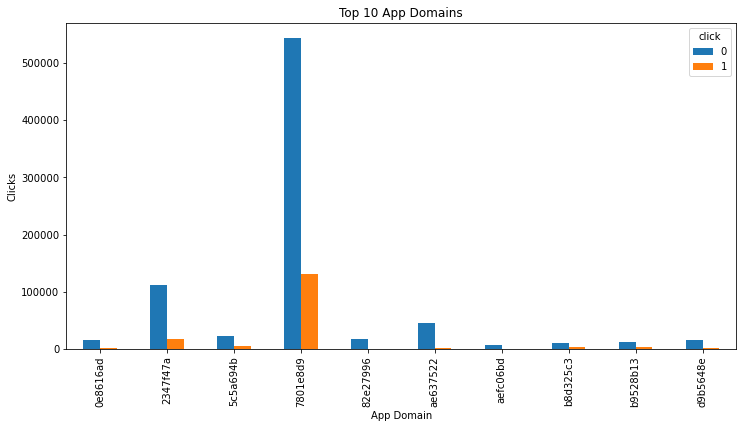

In [78]:
top10_device = train[(train.app_domain.isin((train.app_domain.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_domain', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App Domains');
plt.ylabel('Clicks')
plt.xlabel('App Domain')

We see that App Domain 7801e8d9 had the highest number of clicks and overall impressions. We can then find the CTR for the various App Domains in the dataset.

In [79]:
top10_devices = (train.app_domain.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_domain== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for App Domain value: {},  click through rate: {}".format(i,click_avg))

for App Domain value: 7801e8d9,  click through rate: 0.19381465353948182
for App Domain value: 2347f47a,  click through rate: 0.1387837225554267
for App Domain value: ae637522,  click through rate: 0.02417917498765273
for App Domain value: 5c5a694b,  click through rate: 0.19357262999677916
for App Domain value: 82e27996,  click through rate: 0.04919769104485516
for App Domain value: d9b5648e,  click through rate: 0.1090857305610937
for App Domain value: 0e8616ad,  click through rate: 0.06914017208763044
for App Domain value: b9528b13,  click through rate: 0.1821177640987378
for App Domain value: b8d325c3,  click through rate: 0.23464410912970585
for App Domain value: aefc06bd,  click through rate: 0.07003075202683813


We can also visualize the CTR for the App Domains.

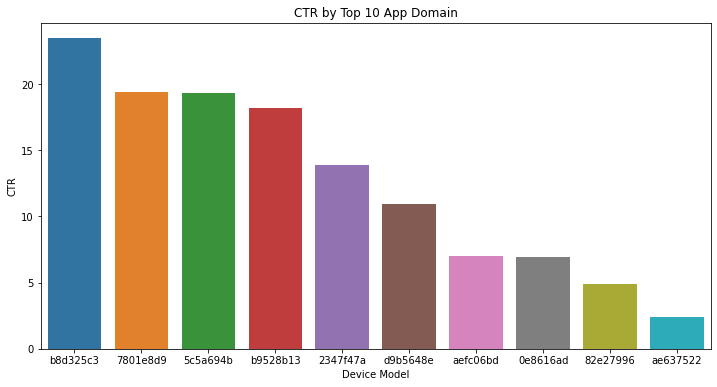

In [80]:
df_category = top10_device[['app_domain','click']].groupby(['app_domain']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_domain','click']].groupby(['app_domain']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_domain'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_domain', data=df_category, order=sort_category)
plt.xlabel('Device Model')
plt.title('CTR by Top 10 App Domain');

In contrary to the App Domain with the highest number of clicks, we see that App Domain b8d325c3 has the highest CTR. Thus, companies should emphasize this App Domain moving forward. We can also examine the dataset by App Category.

In [81]:
train.app_category.nunique()

27

We also measure how many impressions there are for each app category in the dataset.

In [82]:
print('The impressions by app categories')
print((train.app_category.value_counts()/len(train)))

The impressions by app categories
07d7df22    0.646447
0f2161f8    0.236826
cef3e649    0.042869
8ded1f7a    0.036506
f95efa07    0.028522
d1327cf5    0.003085
dc97ec06    0.001347
09481d60    0.001310
75d80bbe    0.000963
fc6fa53d    0.000594
4ce2e9fc    0.000486
879c24eb    0.000301
a3c42688    0.000252
4681bb9d    0.000146
0f9a328c    0.000145
a86a3e89    0.000057
2281a340    0.000047
8df2e842    0.000035
79f0b860    0.000019
0bfbc358    0.000010
2fc4f2aa    0.000010
7113d72a    0.000008
a7fd01ec    0.000006
18b1e0be    0.000005
5326cf99    0.000002
0d82db25    0.000001
bf8ac856    0.000001
Name: app_category, dtype: float64


We can also plot the number of clicks versus total impressions by App Category.

Text(0.5, 0, 'App Category')

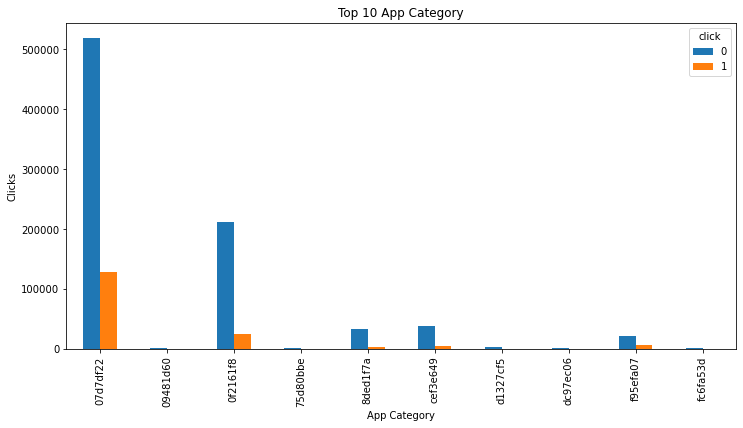

In [83]:
top10_device = train[(train.app_category.isin((train.app_category.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['app_category', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 App Category');
plt.ylabel('Clicks')
plt.xlabel('App Category')

We see that App Category 07d7df22 and 0f2161f8 had the highest number of impressions and clicks. Next, we can also view the CTR by App Category.

In [84]:
top10_devices = (train.app_category.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.app_category== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for App Category value: {},  click through rate: {}".format(i,click_avg))

for App Category value: 07d7df22,  click through rate: 0.1980641877833759
for App Category value: 0f2161f8,  click through rate: 0.10757264827341592
for App Category value: cef3e649,  click through rate: 0.0939140171219296
for App Category value: 8ded1f7a,  click through rate: 0.09310798224949324
for App Category value: f95efa07,  click through rate: 0.2492812565738728
for App Category value: d1327cf5,  click through rate: 0.12641815235008103
for App Category value: dc97ec06,  click through rate: 0.14402375649591687
for App Category value: 09481d60,  click through rate: 0.14580152671755725
for App Category value: 75d80bbe,  click through rate: 0.09034267912772585
for App Category value: fc6fa53d,  click through rate: 0.04882154882154882


We can also visualize the CTR.

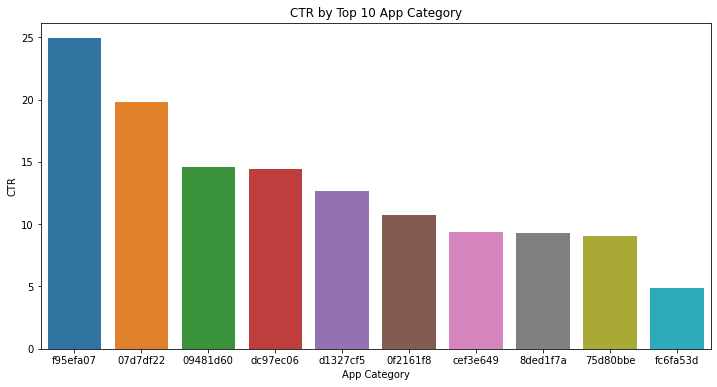

In [85]:
df_category = top10_device[['app_category','click']].groupby(['app_category']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['app_category','click']].groupby(['app_category']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['app_category'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='app_category', data=df_category, order=sort_category)
plt.xlabel('App Category')
plt.title('CTR by Top 10 App Category');

Based on this graph, we see that App Category f95efa07 had the highest CTR. Thus, companies should potentially emphasize this App Category more moving forward. Next, we can study the other C category variables in the dataset.

In [86]:
train.C14.nunique()

2249

Beginning with C14, we can look a the values with the highest percentage of impressions.

In [87]:
print('The impressions by C14 values')
print((train.C14.value_counts()/len(train)))

The impressions by C14 values
4687     0.023381
21611    0.022416
21189    0.019013
21191    0.018959
19772    0.018061
           ...   
18565    0.000001
18554    0.000001
18428    0.000001
22582    0.000001
23679    0.000001
Name: C14, Length: 2249, dtype: float64


We can also plot a graph of clicks vs total impressions by C14 value.

Text(0.5, 0, 'C14')

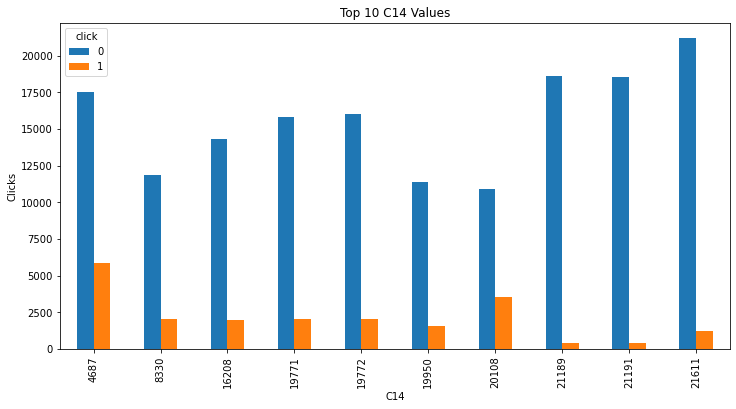

In [88]:
top10_device = train[(train.C14.isin((train.C14.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C14', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C14 Values');
plt.ylabel('Clicks')
plt.xlabel('C14')

We see that C14 value 21611 had the largest number of impressions, but value 4687 had the largest number of clicks. Next, we can find the CTR of the different C14 values.

In [89]:
top10_devices = (train.C14.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C14== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C14 value: {},  click through rate: {}".format(i,click_avg))

for C14 value: 4687,  click through rate: 0.24926222146187074
for C14 value: 21611,  click through rate: 0.05504996431120628
for C14 value: 21189,  click through rate: 0.02093304581076106
for C14 value: 21191,  click through rate: 0.020465214410042724
for C14 value: 19772,  click through rate: 0.11162172637174021
for C14 value: 19771,  click through rate: 0.11380565667880145
for C14 value: 16208,  click through rate: 0.12116366320191893
for C14 value: 20108,  click through rate: 0.24468676205028475
for C14 value: 8330,  click through rate: 0.14621353642764764
for C14 value: 19950,  click through rate: 0.12254826254826255


We can also visualize the CTR of the C14 values.

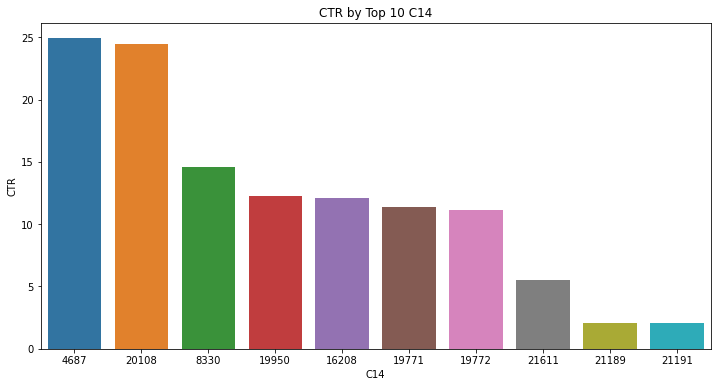

In [90]:
df_category = top10_device[['C14','click']].groupby(['C14']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C14','click']].groupby(['C14']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C14'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C14', data=df_category, order=sort_category)
plt.xlabel('C14')
plt.title('CTR by Top 10 C14');

Based on this graph, we see that value 20108 had the highest CTR. This is in contrast to the values we saw previously with the highest number of clicks and impressions. Thus, emphasizing this C14 value more could be beneficial for companies. Next, we can plot the number of unique C15 values as well as the C15 values with the highest percentage of impressions. This can be seen below.

In [91]:
train.C15.nunique()

8

In [92]:
print('The impressions by C15 values')
print((train.C15.value_counts()/len(train)))

The impressions by C15 values
320     0.933017
300     0.057618
216     0.007313
728     0.001801
120     0.000076
1024    0.000071
480     0.000070
768     0.000034
Name: C15, dtype: float64


We can also plot a histogram of the number of clicks versus total impressions by C15 value.

Text(0.5, 0, 'C15')

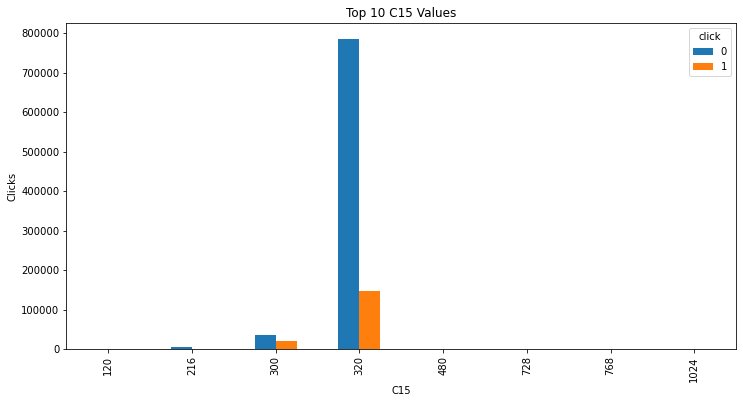

In [93]:
top10_device = train[(train.C15.isin((train.C15.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C15', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C15 Values');
plt.ylabel('Clicks')
plt.xlabel('C15')

Based on this graph, we see that C15 value 320 had the highest number of clicks and total impressions. We can also find the CTR of these different values.

In [94]:
top10_devices = (train.C15.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C15== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C15 value: {},  click through rate: {}".format(i,click_avg))

for C15 value: 320,  click through rate: 0.1578781522737528
for C15 value: 300,  click through rate: 0.359974313582561
for C15 value: 216,  click through rate: 0.12525639272528374
for C15 value: 728,  click through rate: 0.054969461410327596
for C15 value: 120,  click through rate: 0.0
for C15 value: 1024,  click through rate: 0.23943661971830985
for C15 value: 480,  click through rate: 0.15714285714285714
for C15 value: 768,  click through rate: 0.5588235294117647


We can then plot a graph of these CTR values.

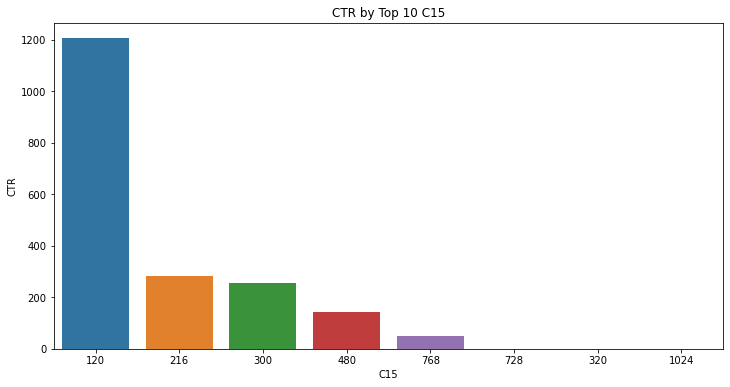

In [95]:
df_category = top10_device[['C15','click']].groupby(['C15']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C15','click']].groupby(['C15']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C15'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C15', data=df_category, order=sort_category)
plt.xlabel('C15')
plt.title('CTR by Top 10 C15');

Based on this graph, we see that although value 320 had the highest number of clicks and impressions, value 120 by far has the highest CTR. Thus, emphasizing this value more could be beneficial for companies moving forward. Next, we can plot the number of unique C16 values there are.

In [96]:
train.C16.nunique()

9

We can also plot the number of impressions there are for each C16 value.

In [97]:
print('The impressions by C16 values')
print((train.C16.value_counts()/len(train)))

The impressions by C16 values
50      0.943310
250     0.044760
36      0.007313
480     0.002565
90      0.001801
20      0.000076
768     0.000071
320     0.000070
1024    0.000034
Name: C16, dtype: float64


We can also plot a graph of the number of clicks vs total impressions by  C16 value.

Text(0.5, 0, 'C16')

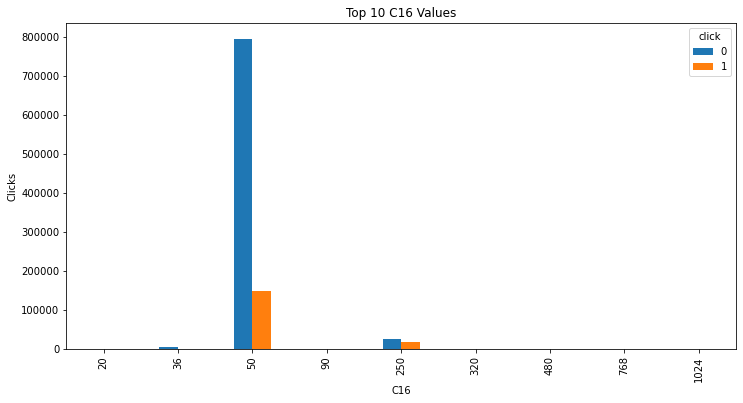

In [98]:
top10_device = train[(train.C16.isin((train.C16.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C16', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C16 Values');
plt.ylabel('Clicks')
plt.xlabel('C16')

Based on this graph, we see that C16 value 50 had the highest number of clicks and impressions. Next, lets plot the CTR for these values.

In [99]:
top10_devices = (train.C16.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C16== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C16 value: {},  click through rate: {}".format(i,click_avg))

for C16 value: 50,  click through rate: 0.157586583413724
for C16 value: 250,  click through rate: 0.42091152815013405
for C16 value: 36,  click through rate: 0.12525639272528374
for C16 value: 480,  click through rate: 0.21481481481481482
for C16 value: 90,  click through rate: 0.054969461410327596
for C16 value: 20,  click through rate: 0.0
for C16 value: 768,  click through rate: 0.23943661971830985
for C16 value: 320,  click through rate: 0.15714285714285714
for C16 value: 1024,  click through rate: 0.5588235294117647


We can also visualize the CTR for the different C16 values.

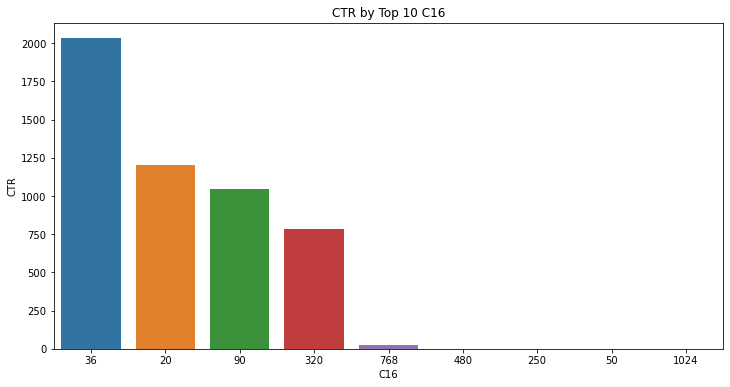

In [100]:
df_category = top10_device[['C16','click']].groupby(['C16']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C16','click']].groupby(['C16']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C16'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C16', data=df_category, order=sort_category)
plt.xlabel('C16')
plt.title('CTR by Top 10 C16');

Based on this graph, we see that C16 value 1024 had the highest CTR. This is contrast to the value we saw previously that had the highest number of impressions and clicks. Thus, companies should potentially emphasize this value more moving forward. Next, we can also plot the number of unique C17 values there are in the dataset.

In [101]:
train.C17.nunique()

422

We can also measure the number of impressions there are for each C17 value.

In [102]:
print('The impressions by C17 values')
print((train.C17.value_counts()/len(train)))

The impressions by C17 values
1722    0.111924
2424    0.037972
2227    0.036252
1800    0.029274
423     0.023381
          ...   
2651    0.000002
2390    0.000002
2375    0.000002
2521    0.000001
2541    0.000001
Name: C17, Length: 422, dtype: float64


We can also plot the number of clicks versus impressions by C17 value.

Text(0.5, 0, 'C17')

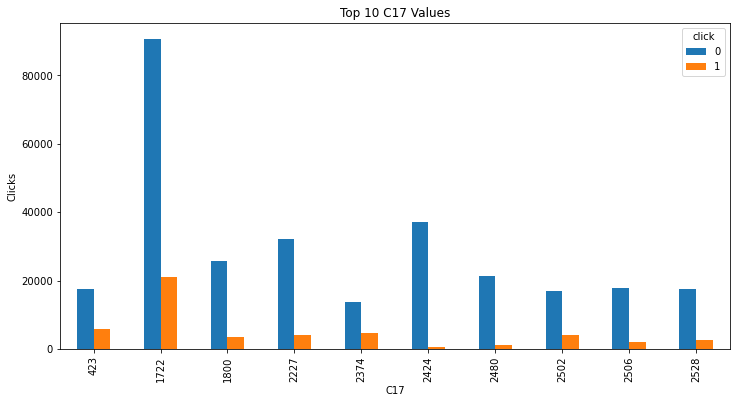

In [103]:
top10_device = train[(train.C17.isin((train.C17.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C17', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C17 Values');
plt.ylabel('Clicks')
plt.xlabel('C17')

Based on this graph, we see that value 1722 has the highest number of clicks and impressions. Next, we can visualize the CTR for each of these different values.

In [104]:
top10_devices = (train.C17.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C17== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C17 value: {},  click through rate: {}".format(i,click_avg))

for C17 value: 1722,  click through rate: 0.18919087952539224
for C17 value: 2424,  click through rate: 0.020699462762035183
for C17 value: 2227,  click through rate: 0.11282136158005075
for C17 value: 1800,  click through rate: 0.12154129944660791
for C17 value: 423,  click through rate: 0.24926222146187074
for C17 value: 2480,  click through rate: 0.05540397817285689
for C17 value: 2502,  click through rate: 0.1977157480688119
for C17 value: 2528,  click through rate: 0.1327403184588166
for C17 value: 2506,  click through rate: 0.10005027652086476
for C17 value: 2374,  click through rate: 0.25512882318281643


We can also visualize the CTR using a graph.

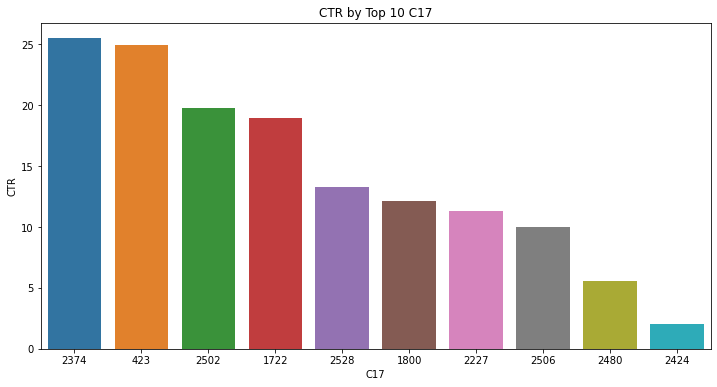

In [105]:
df_category = top10_device[['C17','click']].groupby(['C17']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C17','click']].groupby(['C17']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C17'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C17', data=df_category, order=sort_category)
plt.xlabel('C17')
plt.title('CTR by Top 10 C17');

Based on this graph, we see that C17 value 2374 had the highest CTR. On the other hand, the value with the highest number of impressions and clicks, 1722, only had the third highest CTR. Thus, emphasizing value 2374 could be beneficial for companies moving foward. Next, we can view the number of unique C18 values there are.

In [106]:
train.C18.nunique()

4

 We can also plot the C18 values with the highest percentage of total impressions.

In [107]:
print('The impressions by C18 values')
print((train.C18.value_counts()/len(train)))

The impressions by C18 values
0    0.418984
3    0.337986
2    0.175614
1    0.067416
Name: C18, dtype: float64


We can then visualize the number of clicks versus total impressions versus C18 value.

Text(0.5, 0, 'C18')

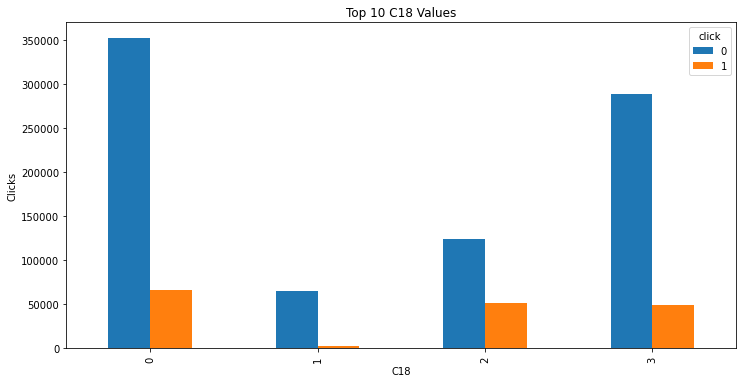

In [108]:
top10_device = train[(train.C18.isin((train.C18.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C18', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C18 Values');
plt.ylabel('Clicks')
plt.xlabel('C18')

We see that values 0 and 3 have the highest number of clicks and overall impressions.We can then measure the CTR of these different values.

In [109]:
top10_devices = (train.C18.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C18== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C18 value: {},  click through rate: {}".format(i,click_avg))

for C18 value: 0,  click through rate: 0.15795352567162468
for C18 value: 3,  click through rate: 0.14433438071399407
for C18 value: 2,  click through rate: 0.2950846743425923
for C18 value: 1,  click through rate: 0.034442862228551085


We can also visualize these CTR values.

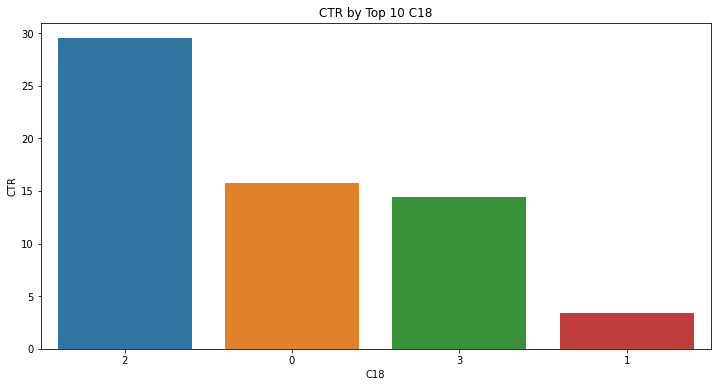

In [110]:
df_category = top10_device[['C18','click']].groupby(['C18']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C18','click']].groupby(['C18']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C18'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C18', data=df_category, order=sort_category)
plt.xlabel('C18')
plt.title('CTR by Top 10 C18');

We see that value 2 has the highest CTR, whereas values 0 and 3 have the second and third highest CTR respectively. Thus, placing more emphasize on this C18 value could be beneficial. Moving on to C19, we can plot the number of unique values there are in the dataset. 

In [111]:
train.C19.nunique()

66

We can also plot the values with the highest percentage of impressions in this category.

In [112]:
print('The impressions by C19 values')
print((train.C19.value_counts()/len(train)))

The impressions by C19 values
35      0.301526
39      0.217605
167     0.077909
161     0.039447
47      0.036232
          ...   
45      0.000058
683     0.000015
545     0.000003
1447    0.000003
1195    0.000002
Name: C19, Length: 66, dtype: float64


We can then plot the number of clicks versus total impressions by C19 value.

Text(0.5, 0, 'C19')

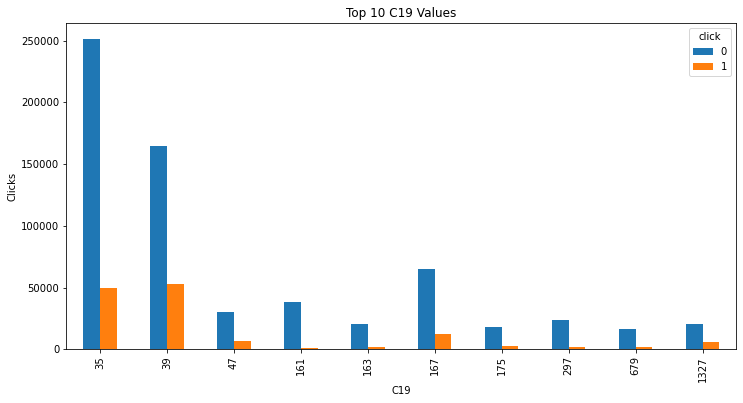

In [113]:
top10_device = train[(train.C19.isin((train.C19.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C19', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C19 Values');
plt.ylabel('Clicks')
plt.xlabel('C19')

Based on this graph, we see that values 35 and 39 had the highest number of clicks and overall impresssions. We can then plot the CTR for the different C19 values.

In [114]:
top10_devices = (train.C19.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C19== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C19 value: {},  click through rate: {}".format(i,click_avg))

for C19 value: 35,  click through rate: 0.1658961416262611
for C19 value: 39,  click through rate: 0.24395119597435722
for C19 value: 167,  click through rate: 0.16147043345441475
for C19 value: 161,  click through rate: 0.023525236393135092
for C19 value: 47,  click through rate: 0.175977036873482
for C19 value: 1327,  click through rate: 0.23161316537992685
for C19 value: 297,  click through rate: 0.07236815959941184
for C19 value: 163,  click through rate: 0.09190429946146376
for C19 value: 175,  click through rate: 0.12202116088203303
for C19 value: 679,  click through rate: 0.11202654133259607


We can also graph the CTRs for the different C19 values.

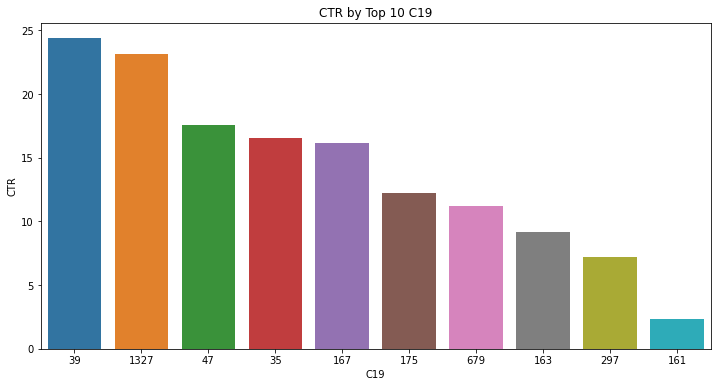

In [115]:
df_category = top10_device[['C19','click']].groupby(['C19']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C19','click']].groupby(['C19']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C19'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C19', data=df_category, order=sort_category)
plt.xlabel('C19')
plt.title('CTR by Top 10 C19');

Based on this graph, we see that values 39 and 1327 had the highest CTR. While we saw value 39 on the previous graph for the values with the most impressions and clicks, 1327 was not one of the values with the highest amount of impressions or clicks. Thus, emphasizing this value could be beneficial for companies moving forward.Next, we can plot the C20 values witht he highest percentage of ad impressions.Next, we can measure the number of unique C20 values there are in the dataset.

In [116]:
train.C20.nunique()

160

We can also measure the total number of impressions there are by percentage for each C20 value.This can be seen below.

In [117]:
print('The impressions by C20 values')
print((train.C20.value_counts()/len(train)))

The impressions by C20 values
-1         0.468377
 100084    0.060108
 100148    0.044413
 100111    0.042621
 100077    0.038807
             ...   
 100108    0.000008
 100175    0.000004
 100100    0.000003
 100186    0.000001
 100098    0.000001
Name: C20, Length: 160, dtype: float64


We can also graph the number of clicks versus total impressions by C20 values.

Text(0.5, 0, 'C20')

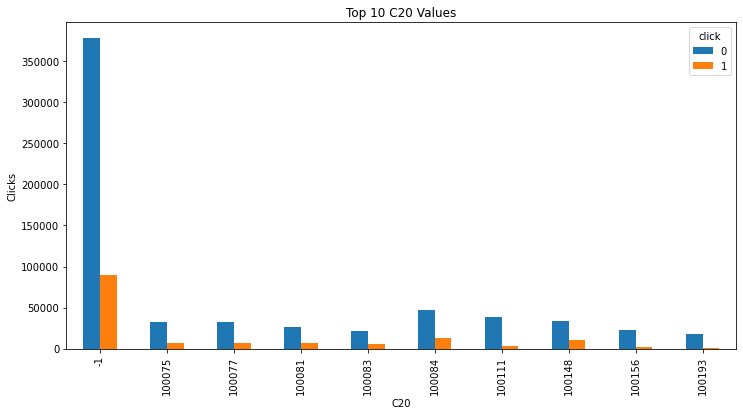

In [118]:
top10_device = train[(train.C20.isin((train.C20.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C20', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C20 Values');
plt.ylabel('Clicks')
plt.xlabel('C20')

Based on this graph, we can see that the value -1 had the highest number of clicks and total impressions. Next, we can plot the C20 values with the highest CTRs.

In [119]:
top10_devices = (train.C20.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C20== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C20 value: {},  click through rate: {}".format(i,click_avg))

for C20 value: -1,  click through rate: 0.19168319537466613
for C20 value: 100084,  click through rate: 0.21531243761229787
for C20 value: 100148,  click through rate: 0.23371535361268098
for C20 value: 100111,  click through rate: 0.08702282912179442
for C20 value: 100077,  click through rate: 0.17386038601283274
for C20 value: 100075,  click through rate: 0.16241463223172933
for C20 value: 100081,  click through rate: 0.19203426904848706
for C20 value: 100083,  click through rate: 0.19500112587255122
for C20 value: 100156,  click through rate: 0.09485839978003849
for C20 value: 100193,  click through rate: 0.02333768667310204


We can then also graph these values.

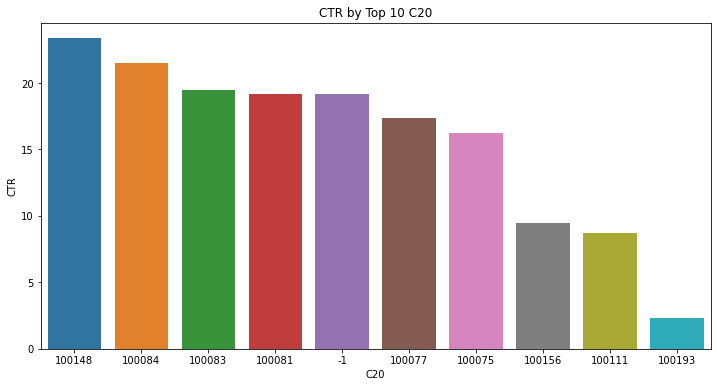

In [120]:
df_category = top10_device[['C20','click']].groupby(['C20']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C20','click']].groupby(['C20']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C20'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C20', data=df_category, order=sort_category)
plt.xlabel('C20')
plt.title('CTR by Top 10 C20');

Based on this graph, we can see that, whereas value -1 had the highest number of clicks and total impressions, values 100148, 1000084 and 100083 had the highest CTR. Thus, emphasizing these values could be beneficial for companies in the future. We can alos measure the number of unique C21 values there are in the dataset.

In [121]:
train.C21.nunique()

60

Next, we can examine the various C21 values by percentage of total impressions.

In [122]:
print('The impressions by C21 values')
print((train.C21.value_counts()/len(train)))

The impressions by C21 values
23     0.220184
221    0.124792
79     0.114485
48     0.053171
71     0.052142
61     0.050726
157    0.045871
32     0.043358
33     0.036980
52     0.029681
42     0.025264
51     0.021016
15     0.019028
212    0.016377
43     0.014602
117    0.010436
229    0.010062
13     0.009521
16     0.008720
156    0.008258
68     0.008179
159    0.007174
95     0.006902
46     0.005920
246    0.004971
69     0.004400
91     0.004263
17     0.004068
111    0.003465
76     0.003455
70     0.003422
90     0.003212
110    0.003025
171    0.002941
204    0.002278
101    0.002018
253    0.001948
112    0.001850
82     0.001759
100    0.001683
182    0.001248
178    0.001204
35     0.001139
108    0.001110
94     0.000550
251    0.000505
116    0.000397
194    0.000327
20     0.000326
93     0.000290
104    0.000242
102    0.000237
126    0.000184
163    0.000163
177    0.000149
255    0.000120
195    0.000090
1      0.000071
219    0.000033
85     0.000008
Name: C21,

Next, we can plot the number of clicks versus total impressions by C21 values.

Text(0.5, 0, 'C21')

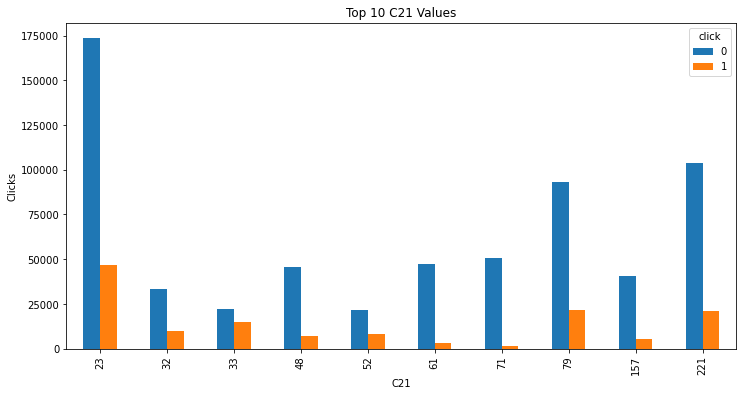

In [123]:
top10_device = train[(train.C21.isin((train.C21.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['C21', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 C21 Values');
plt.ylabel('Clicks')
plt.xlabel('C21')

Based on this graph, we see that values 23 and 221 had the highest number of clicks and total impressions. Moving on, we can also calculate the CTR by the different C21 values.

In [124]:
top10_devices = (train.C21.value_counts()/len(train))[0:10].index
click_avg_list=[]

for i in top10_devices:
    click_avg=train.loc[np.where((train.C21== i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C21 value: {},  click through rate: {}".format(i,click_avg))

for C21 value: 23,  click through rate: 0.21165933946154125
for C21 value: 221,  click through rate: 0.16736649785242644
for C21 value: 79,  click through rate: 0.18722103332314277
for C21 value: 48,  click through rate: 0.13716123450753231
for C21 value: 71,  click through rate: 0.028115530666257528
for C21 value: 61,  click through rate: 0.06525253321767929
for C21 value: 157,  click through rate: 0.11545420854134421
for C21 value: 32,  click through rate: 0.2289312237649338
for C21 value: 33,  click through rate: 0.39724175229853975
for C21 value: 52,  click through rate: 0.2674775108655369


We can also generate a graph to visualize the CTR.

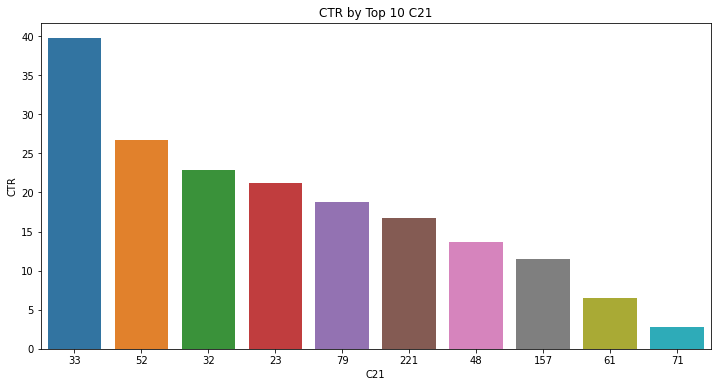

In [125]:
df_category = top10_device[['C21','click']].groupby(['C21']).count().reset_index()
df_category = df_category.rename(columns={'click': 'impressions'})
df_category['clicks'] = top10_device_click[['C21','click']].groupby(['C21']).count().reset_index()['click']
df_category['CTR'] = df_category['clicks']/df_category['impressions']*100
sort_category = df_category.sort_values(by='CTR',ascending=False)['C21'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C21', data=df_category, order=sort_category)
plt.xlabel('C21')
plt.title('CTR by Top 10 C21');

Based on this graph, we can see that values 33 and 52 had the highest CTR. This in contrast to the values we saw previously with the highest number of add impressions. Thus, emphasizing these values more could be beneficial for companies moving forward. Next, now that we have completed our Explaratory Data Analysis, we can move on to the Feature Engineering session of the analysis.

# Feature Engineering

Based on the EDA, we can see which features are the most important for our analysis, as well as the changes we need to make to our dataset before we employ our machine learning model.  As mentioned previously, because this machine learning problem is a classification problem, there are several different model types that may be the most effective. These models include Logistic Regression, Naïve Bayes and Decision Tree. Each of these different machine learning mechanisms will be explored throughout the course of this paper. However, in using these different machine learning algorithms, several changes had to be made to the data in order to prepare them for the analysis. To begin with we drop the hour label as well as the label id. We drop hour because it has already been converted into two other variables, day_of_week and hour_of_day. We drop id because it has no significant as it simply represents each individual user id for the observations in the dataset. We also drop device ip. Next, we need to change the datatypes of some of the variables in order to allow the machine learning model to work. Specifically, we change all of the values to integers. In order to do this, we use hashing to change the variables datatypes to integers for those that were previously considered objects. We also need to add some variables to the test dataset so the number of features is the same, as well as apply the data transformation to the test dataset as well. All of these changes can be seen below.

In [126]:
train.drop('id', axis=1, inplace=True)
train.drop('device_ip', axis=1, inplace=True)
train.drop('hour', axis=1, inplace=True)
train.drop('my_dates', axis=1, inplace=True)

In [127]:
test['hour_of_day'] = test.hour.apply(lambda x: x.hour)
test['my_dates'] = pd.to_datetime(test['hour'])
test['day_of_week'] = test['my_dates'].dt.day_name()

In [128]:
test.drop('hour', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
test.drop('my_dates', axis=1, inplace=True)
test.drop('device_ip', axis=1, inplace=True)

In [129]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [130]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
test = convert_obj_to_int(test)

In [131]:
test.dtypes

C1                   int64
banner_pos           int64
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_model_int     int64
day_of_week_int      int64
dtype: object

In [132]:
train.dtypes

click                int64
C1                   int64
banner_pos           int64
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
hour_of_day          int64
site_id_int          int64
site_domain_int      int64
site_category_int    int64
app_id_int           int64
app_domain_int       int64
app_category_int     int64
device_id_int        int64
device_model_int     int64
day_of_week_int      int64
dtype: object

In [133]:
Y = train.click.values

As part of the next step, in order to help make our machine learning algorithms run smoother, scaling the data is very important. Specifically, we scale all of the variables on a range from 0 to 1. This ensures that the data will be easily readable by the machine learning model and will ensure the training and testing process goes smoothly. Thus, we apply a scaler to both the training and data sets. Once these changes are complete, we are ready to implement our machine learning model.

# Machine Learning Model

To begin with, we will use a logistic regression machine learning model. Logistic regression models are excellent for binary classification problems, such as the one we are employing in this study.

# Logistic Regression

Initially, in order to run our logistic regression model, we need to isolate the output variable and the features in the training dataset.

In [134]:
X = train.loc[:, train.columns != 'click']

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_test, x_train, y_test, Y_train = train_test_split(X,Y, test_size = 0.3)

Then, we can add our logistic regression model.

In [137]:
clf_LR = LogisticRegression(penalty='none', fit_intercept=True, max_iter=10000, verbose = 2, class_weight = 'balanced')

We then fit our model.

In [138]:
clf_LR.fit(x_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07944D+05    |proj g|=  8.94424D+22

At iterate    1    f=  2.06317D+05    |proj g|=  8.21942D+22

At iterate    2    f=  2.05516D+05    |proj g|=  3.35470D+22

At iterate    3    f=  2.05279D+05    |proj g|=  2.92196D+22

At iterate    4    f=  2.04608D+05    |proj g|=  1.56915D+22

At iterate    5    f=  2.04530D+05    |proj g|=  6.11994D+21

At iterate    6    f=  2.04514D+05    |proj g|=  2.60054D+21

At iterate    7    f=  2.04505D+05    |proj g|=  2.82842D+21

At iterate    8    f=  2.04501D+05    |proj g|=  1.19429D+21

At iterate    9    f=  2.04500D+05    |proj g|=  3.70505D+20

At iterate   10    f=  2.04500D+05    |proj g|=  3.35122D+20

At iterate   11    f=  2.04500D+05    |proj g|=  1.48134D+20

At iterate   12    f=  2.04500D+05    |proj g|=  3.49553D+19

At iterate   13    f=  2.0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(class_weight='balanced', max_iter=10000, penalty='none',
                   verbose=2)

We then run our model on the test set.

In [139]:
log_reg_pred = clf_LR.predict(x_test)

Once the machine learning model has been run, we can work towards optimizing it. In terms of optimizing a machine learning model, there are a variety of different metrics which can be of assistance. These metrics include precision, recall, f1 score and accuracy. In defining these different metrics, we see that precision equals the number of true positive divided by the total number of positives in the model. Thus it generally indicates the quality of positive predictions made by the mode. On the other hand, recall, refers to the ratio between the number of positive samples correctly classified to the total number of positive samples. Thus, the recall measures the model's ability to detect positive samples. Next, the f1 score is also important.Specifically, it takes combines both precision and recall by taking their harmonic mean. This is typically used to compare the performance of two different classifiers. Lastly, accuracy measures the number of correctly predicted data points out of all the datapoints. Next, we will print a classification report to view all of these different metrics. In evaluating the effectiveness of machine learning models and analyzing these different metrics, we also need to understand prediction errors associated with variance and bias. In machine learning, bias is defined as the difference between the average prediction of the model and the correct value we are attempting to predict. On the other hand variance is defined as the variability of the model for a given data point. We need to keep in mind both of these concepts when evaluating our models. In machine learning, we also need to be aware of the possibily of underfitting and overfitting. Underfitting is defined as when the model is unable to capture the underlying pattern of the data. Overffitting is defined as when the model captures too much noise along with the pattern of the data. There is a tradeoff between these different concepts, increasing bias can reduce variance and vice versa. The key is finding a good balance of both concepts to heighten the performance of the model.

In [140]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.87      0.55      0.67    581620
           1       0.21      0.59      0.31    118380

    accuracy                           0.55    700000
   macro avg       0.54      0.57      0.49    700000
weighted avg       0.76      0.55      0.61    700000



There is also something in machine learning called the roc auc score. Similar to the previous metrics, this score is used to calculate the overall quality of the model. Generally, speaking it allows us to to see how good the model is at distinguishing between classes.

In [141]:
print(roc_auc_score(y_test, log_reg_pred))

0.5692498583879171


We can also visualize the results of the model using a confusion matrix. This will allow us to see the number of true positives and true negatives, as well as the number of false positives and false negatives there are in the model.

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
print(confusion_matrix(y_test, log_reg_pred))

[[317344 264276]
 [ 48195  70185]]


In examing all of these different metrics. We can then work to optimize our machine learning model. Specifically, we can work to optimize the various parameters we input into the model to see which one generates the best results. In the first iteration, the model was very good at predicting 0 values, but not very good at distinguishing when a value of 1 had occured. In order to rectify this, I continued experimenting with different parameters until I could see which one worked best. Because, in this case, we are very concerned with the models ability to distinguish between different classes, the models precision, recall and f1 scroes will be key metrics of the models effectiveness. In observing changes in these metrics, we see that by increasing the number of max iterations, as well as adjusting a few other parameters such as the penalty, as well as whether or not the model is verbose, we could improve these scores. In general, we see that this basic model could still be improved, perhaps by trying a more complex version of a logistic regression. It appears the model is overfitted with a high amount of variance. Next, we will examine a Naive Bayes based machine learning model.

# Naive Bayes

In [144]:
nav_bayes_model = GaussianNB()

In [145]:
nav_bayes_model.fit(x_train, Y_train)

GaussianNB()

In [146]:
nav_bayes_pred = nav_bayes_model.predict(x_test)

In [147]:
print(classification_report(y_test, nav_bayes_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    581620
           1       0.11      0.00      0.00    118380

    accuracy                           0.83    700000
   macro avg       0.47      0.50      0.45    700000
weighted avg       0.71      0.83      0.75    700000



In [148]:
print(roc_auc_score(y_test, nav_bayes_pred))

0.49988533172799265


In [149]:
print(confusion_matrix(y_test, nav_bayes_pred))

[[581295    325]
 [118341     39]]


In evaluating this model and working towards optimizing it, we can see that it performs similarly to the logistic regression model in a number of ways. Specifically, we see that the precision value is about the same. However, a number of other metrics, including recall, are lower. Based on the confusion matrix, we can also see that this model is not as good at distinguishing between clicks and non-clicks. We can also see that the ROC AUC score is lower.However,  it has a higher accuracy score, indicating it predicted more points overall correctly. We also see that, based on the confusion matrix, the model appears to be underfitted. Unfortunately, in this model, there are not as many parameters we can adjust to try and get a better result. Next, we can also examine the decision tree model.

# Decision Tree

In [150]:
dec_tree_model = DecisionTreeClassifier()

In [151]:
dec_tree_model.fit(x_train, Y_train)

DecisionTreeClassifier()

In [152]:
dec_tree_pred = dec_tree_model.predict(x_test)

In [153]:
print(classification_report(y_test, dec_tree_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85    581620
           1       0.27      0.27      0.27    118380

    accuracy                           0.75    700000
   macro avg       0.56      0.56      0.56    700000
weighted avg       0.75      0.75      0.75    700000



In [154]:
print(confusion_matrix(y_test, dec_tree_pred))

[[494995  86625]
 [ 86174  32206]]


In analyzing this algorthm, we see that the precision is about the same. We also see that the recall score is lower. We see that this model is also underfitted. Lastly, the accuracy value seems to be pretty high. While it is difficult to compare these models based on the precision score alone because they are the same, we can view the confusion matricies to see which had a higher percentage of clicks classified correctly. Thus, in viewing the results of these various machine learning algorithms, we see that the Decision Tree and Logistic Regression Algorithm works the best. Next, I will try an ensemble decision tree method to see if the results are even better. Ensemble decision trees allow for even more accurate results to be obtained. In machine learning, it is not only the selection of the parameters that matters, but also the selection of the model itself. Certain models work better with certain datasets. Furthermore, certain types of models, for example ensemble models, inherently perform better because they already have numerous models incorporated within. This can improve the performance of the model by implementing the same model numerous times on the same dataset. Thus, in viewing these models we have already implemented, we see that their performance still leaves something to be desired. This leads us to try an ensemble method to try and improve the models performance.

# Ensemble Decision Tree

Ensemble Decision Trees can improve the accuracy of data by taking a cumulative sample of a larger amount of Decision Trees. This can optimize our results, as by taking into account a greater sample of decision trees, the final result can improve.

In [155]:
import lightgbm as lgb

In [156]:
X_train = train.loc[:, train.columns != 'click']
y_target = train.click.values

In [157]:
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)

In [158]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.03,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

#0.40054547600913726

Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.453193
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.451312
[3]	valid_0's binary_logloss: 0.449529
[4]	valid_0's binary_logloss: 0.447791
[5]	valid_0's binary_logloss: 0.446244
[6]	valid_0's binary_logloss: 0.444606
[7]	valid_0's binary_logloss: 0.443218
[8]	valid_0's binary_logloss: 0.441865
[9]	valid_0's binary_logloss: 0.440517
[10]	valid_0's binary_logloss: 0.439363
[11]	valid_0's binary_logloss: 0.438274
[12]	valid_0's binary_logloss: 0.437225
[13]	valid_0's binary_logloss: 0.436136
[14]	valid_0's binary_logloss: 0.43513
[15]	valid_0's binary_logloss: 0.434187
[16]	valid_0's binary_logloss: 0.433276
[17]	valid_0's binary_logloss: 0.432373
[18]	valid_0's binary

In [159]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.3984388029554979)])})
4076


In [160]:
with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/test.gz') as f:
    test2 = pd.read_csv(f, parse_dates = ['hour'], date_parser = parse_date)

test2.head()

/var/folders/k4/qwxkdjvd59x4b8wd12gnq86c0000gn/T/ipykernel_91060/4148211152.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,2014-10-31,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,2014-10-31,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,2014-10-31,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [161]:
with gzip.open('/Users/wmeikle/Downloads/avazu-ctr-prediction-3/SampleSubmission.gz') as f:
    SampleSubmission = pd.read_csv(f)

In [162]:
test2['hour_of_day'] = test2.hour.apply(lambda x: x.hour)
test2['my_dates'] = pd.to_datetime(test2['hour'])
test2['day_of_week'] = test2['my_dates'].dt.day_name()

In [163]:
test2.drop('hour', axis=1, inplace=True)
test2.drop('id', axis=1, inplace=True)
test2.drop('my_dates', axis=1, inplace=True)
test2.drop('device_ip', axis=1, inplace=True)

In [164]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
test2 = convert_obj_to_int(test2)

In [165]:
predictions = gbm.predict(test2)

In [166]:
my_submission = pd.DataFrame({'id': SampleSubmission['id'], 'click': predictions})

In [167]:
my_submission.to_csv('submissionnewestversion.csv',index = False)

By adjusting the various parameters in the model, I could see which worked better with this particular dataset. Of the different parameters, there are the number of leaves in the decision trees, the learning rate of the decision trees, the feature fraction, the bagging fraction, the bagging frequency and the the value verbose. In this model, the number of leaves refers to the number of nodes there are in each decision tree. The learning rate refers to the amount of change applied to the model based on the estimated error of the previous step. Next, the feature fraction refers to the percentage of features that are selected with each iteration of the model. Subsequently, the bagging fraction and bagging frequency both refer to the amount of random samples that the model will select to train. There is also the number of boosted rounds parameter. This essentially refers to the number of trees that will be incorporated in the mode. Initially, in trying to optimize the model, I expanded the number of iterations, this helped increased the score up until a point, but after a while it stopped having any significant effect. I continued by messing around with various parameters in the dataset until I found one that produced the best results. I also considered the nature of the data in terms of deciding which elements would be best to adjust. It can be seen that, with this model type a lower learning rate and lower bagging rate seemed to be the most effective. We see that the model performed pretty well. However, there is still room for improvement. 

# Model Improvement Ideas

There are several different ideas we could implement to improve the accuracy of these models. 
   * For one, we could combine different features in the dataset
   * We could also combine several features that are related to one another, this could improve the accuracy  of the model
   * Another option could be employing a more complex model, like a deep learning model, this could further improve our results